# Football Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fb = pd.read_excel('FootballPlayers.xlsx')

In [3]:
print("Shape: ", fb.shape)
print("Columns: ", fb.columns)

Shape:  (17981, 46)
Columns:  Index(['Wage ($)', 'Value ($)', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'Preferred Positions'],
      dtype='object')


In [4]:
fb.head()

Wage ($)  Value ($)               Name  Age  \
0    491304   83043478  Cristiano Ronaldo   32   
1    491304   91304348           L. Messi   30   
2    243478  106956522             Neymar   25   
3    443478   84347826          L. Suárez   30   
4    200000   53043478           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club  ... Short passing  Shot power  Sliding tackle  \
0       Real Madrid CF  ...          83.0        94.0            23.0   
1         FC Barcelona  ...          88.0        85.0            26.0   
2  Paris Saint-Germain  ...          81.0        80.0            33.0   
3         FC Barcelona  ...          83.0        87.0            38.0   
4     FC Bayern Munich  ...          55.0        25.0            11.0   

   Sprint speed  Stamina  Standing tackle  Strength  Vision  Volleys  \
0          91.0     92.0             31.0      80.0    85.0     88.0   
1          87.0     73.0             28.0      59.0    90.0     85.0   
2          90.0     78.0             24.0      53.0    80.0     83.0   
3          77.0     89.0             45.0      80.0    84.0     88.0   
4          61.0     44.0             10.0      83.0    70.0     11.0   

   Preferred Positions  
0                ST LW  
1                   RW  
2                   LW  
3                   ST  
4                   GK  

[5 rows x 46 columns]

We won't use pictures in this analysis and so, we will drop the two columns

In [5]:
fb = fb.drop(columns = ['Photo', 'Flag'])
fb.shape

(17981, 44)

## Things to explore

### Relation between wage, value and country          
### Age and value/wage                                                
### Ratio of value to wage
### Country vs Skill                                                       
### Correlation between attributes - unexpected correlations
### Overall > Potential?
### Who has large differences between similar values like sprint speed and stamina
### Dissimilar preferred positions?
### All rounders: Strikers strong in defence and defenders strong in strikes
### Relation between position and certain attributes- like defence/attack vs header accuracy
### Do allrounders have a higher wage?
### Players from each country                                     
### Proportion of players at a certain position from a country

In [6]:
fb = fb.drop(columns = 'Club Logo')

In [7]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 43 columns):
Wage ($)               17981 non-null int64
Value ($)              17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Acceleration           17897 non-null float64
Aggression             17913 non-null float64
Agility                17910 non-null float64
Balance                17924 non-null float64
Ball control           17840 non-null float64
Composure              17887 non-null float64
Crossing               17885 non-null float64
Curve                  17908 non-null float64
Dribbling              17850 non-null float64
Finishing              17867 non-null float64
Free kick accuracy     17932 non-null float64
GK diving              17955 n

In [8]:
pd.set_option('display.max_columns', None)
fb.describe()

Wage ($)     Value ($)           Age       Overall     Potential  \
count   17981.000000  1.798100e+04  17981.000000  17981.000000  17981.000000   
mean    10040.937212  2.074252e+06     25.144541     66.247984     71.190813   
std     20069.511431  4.655626e+06      4.614272      6.987965      6.102199   
min         0.000000  0.000000e+00     16.000000     46.000000     46.000000   
25%      1739.000000  2.608700e+05     21.000000     62.000000     67.000000   
50%      3478.000000  5.869570e+05     25.000000     66.000000     71.000000   
75%     10435.000000  1.826087e+06     28.000000     71.000000     75.000000   
max    491304.000000  1.069565e+08     47.000000     94.000000     94.000000   

       Acceleration    Aggression       Agility       Balance  Ball control  \
count  17897.000000  17913.000000  17910.000000  17924.000000  17840.000000   
mean      64.576521     55.791492     63.333613     63.803894     58.071469   
std       14.918313     17.476572     14.802800     14.100950     16.834554   
min       11.000000     11.000000     14.000000     11.000000      8.000000   
25%       56.000000     43.000000     55.000000     56.000000     53.000000   
50%       67.000000     59.000000     65.000000     66.000000     63.000000   
75%       75.000000     69.000000     74.000000     74.000000     69.000000   
max       96.000000     96.000000     96.000000     96.000000     95.000000   

          Composure      Crossing         Curve     Dribbling    Finishing  \
count  17887.000000  17885.000000  17908.000000  17850.000000  17867.00000   
mean      57.877341     49.725301     47.261112     55.007227     45.20272   
std       12.938165     18.474237     18.463394     19.019335     19.47324   
min        5.000000      5.000000      6.000000      2.000000      2.00000   
25%       51.000000     37.000000     34.000000     48.000000     29.00000   
50%       60.000000     54.000000     48.000000     61.000000     48.00000   
75%       67.000000     64.000000     62.000000     68.000000     61.00000   
max       96.000000     91.000000     92.000000     97.000000     95.00000   

       Free kick accuracy     GK diving   GK handling    GK kicking  \
count        17932.000000  17955.000000  17954.000000  17962.000000   
mean            43.133393     16.664940     16.444135     16.344171   
std             17.569475     17.698083     16.928068     16.548405   
min              4.000000      1.000000      1.000000      1.000000   
25%             31.000000      8.000000      8.000000      8.000000   
50%             42.000000     11.000000     11.000000     11.000000   
75%             57.000000     14.000000     14.000000     14.000000   
max             93.000000     91.000000     91.000000     95.000000   

       GK positioning   GK reflexes  Heading accuracy  Interceptions  \
count    17955.000000  17952.000000      17906.000000   17881.000000   
mean        16.434698     16.783033         52.303585      46.499581   
std         17.049764     17.971706         17.423964      20.693651   
min          1.000000      1.000000          4.000000       4.000000   
25%          8.000000      8.000000         44.000000      26.000000   
50%         11.000000     11.000000         56.000000      52.000000   
75%         14.000000     14.000000         64.000000      64.000000   
max         91.000000     90.000000         94.000000      92.000000   

            Jumping  Long passing    Long shots       Marking     Penalties  \
count  17911.000000  17860.000000  17898.000000  17869.000000  17951.000000   
mean      64.883870     52.404087     47.158286     44.020259     48.970642   
std       11.892982     15.542677     19.288719     21.582696     15.814548   
min       13.000000      7.000000      3.000000      4.000000      5.000000   
25%       58.000000     42.000000     32.000000     22.000000     39.000000   
50%       66.000000     56.000000     51.000000     48.000000     50.000000   
75%       73.000000     64.000000 

Histogram of all attributes

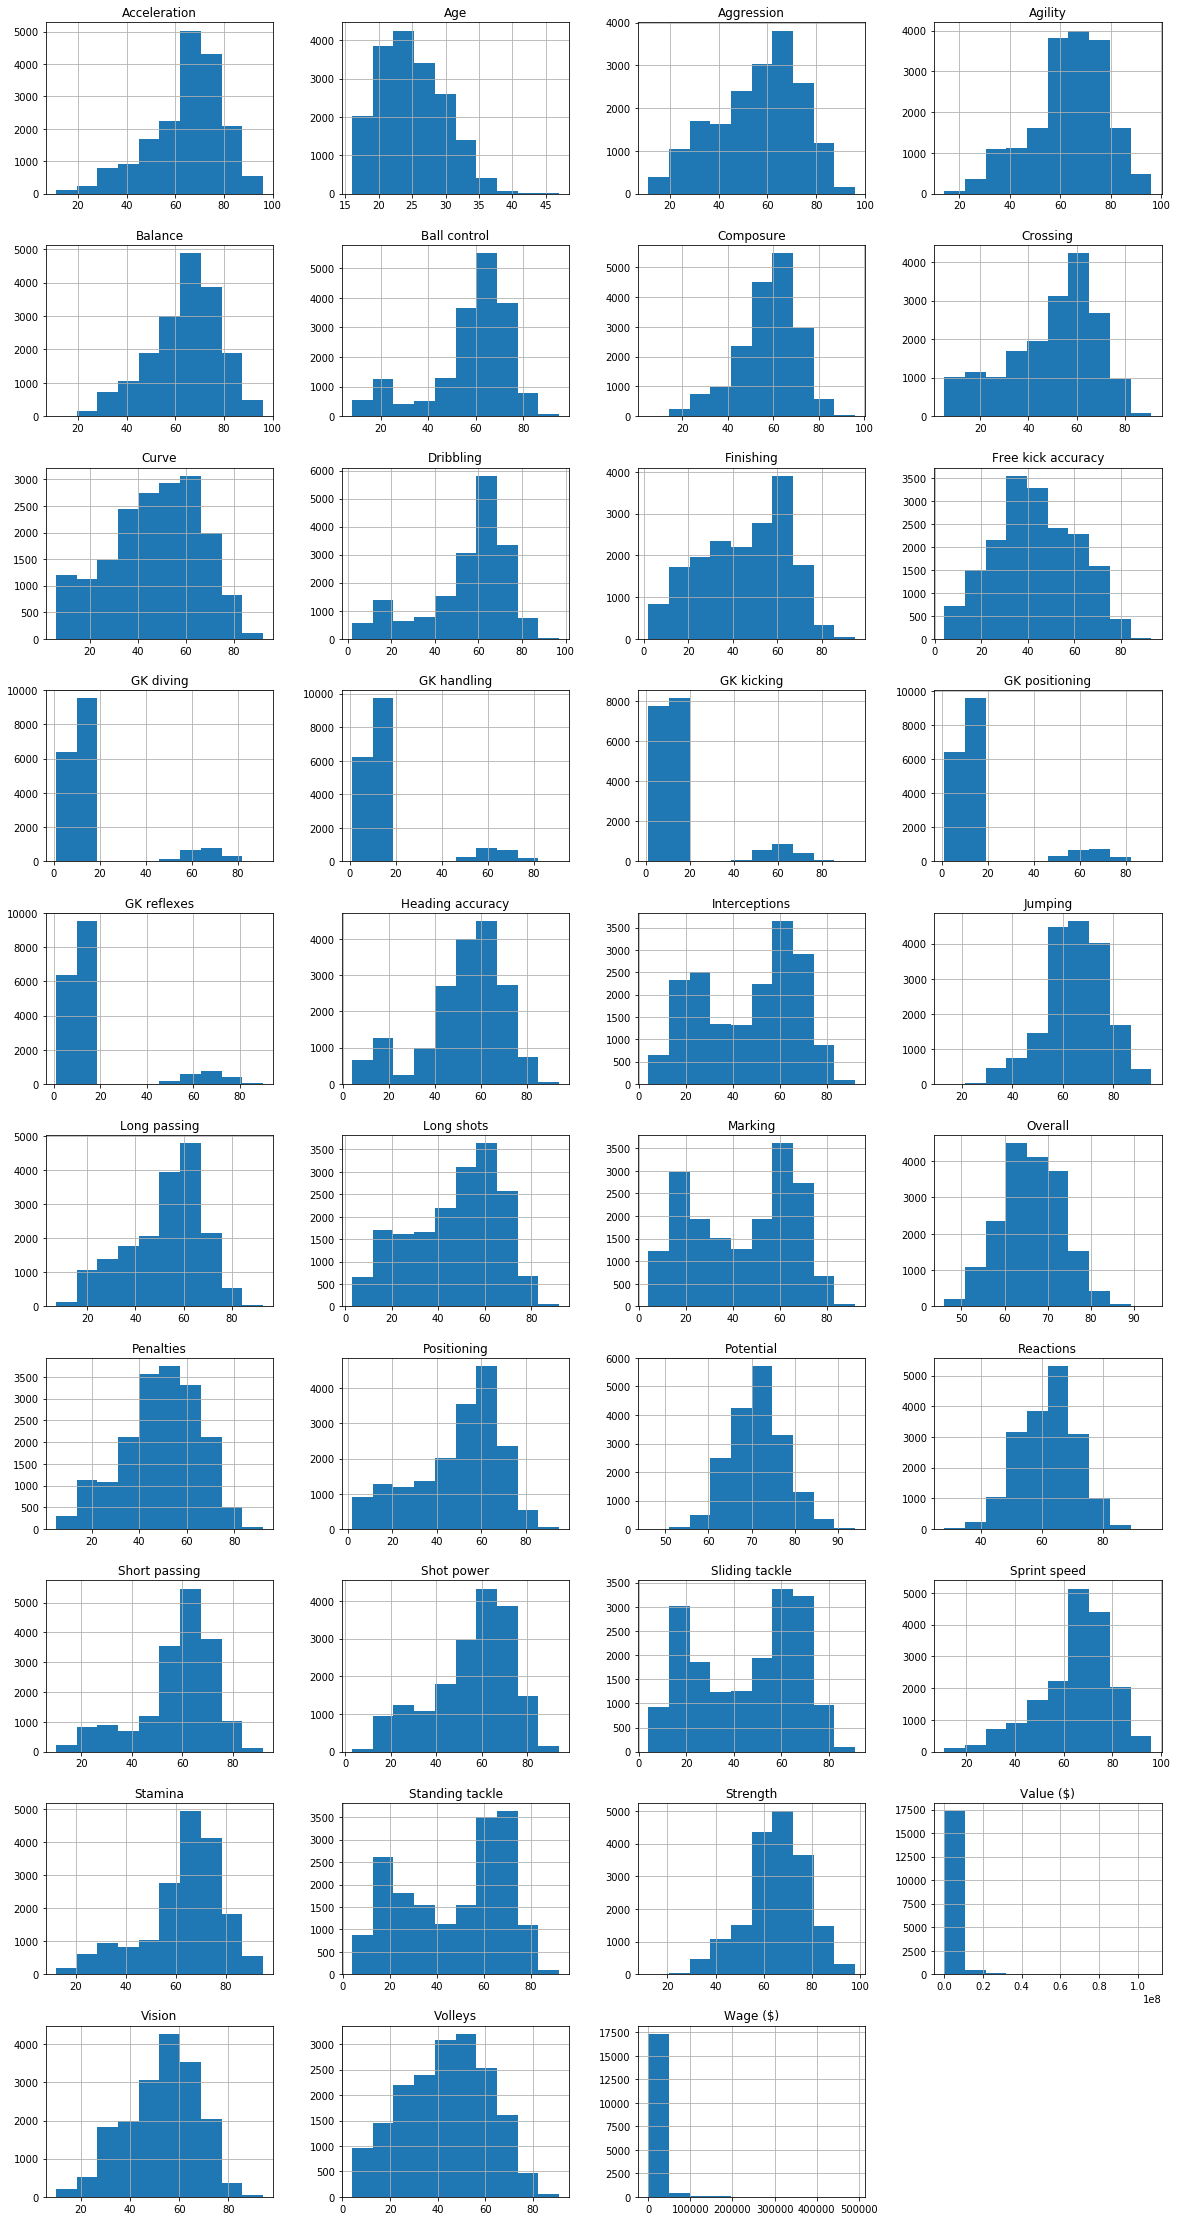

In [9]:
fb.hist(figsize=(20,40), layout = (10,4))
plt.show()

## Goal Keepers

In [10]:
gk = fb.loc[fb['Preferred Positions'].str.contains('GK')]
ngk = fb.loc[(fb['Preferred Positions'].str.contains('GK')== False)]

In [11]:
gk.describe()

Wage ($)     Value ($)          Age      Overall    Potential  \
count    2029.000000  2.029000e+03  2029.000000  2029.000000  2029.000000   
mean     6830.676195  1.367806e+06    26.077378    64.710202    69.724988   
std     14245.214016  3.734928e+06     5.395541     7.710798     6.444213   
min         0.000000  0.000000e+00    16.000000    46.000000    46.000000   
25%       870.000000  1.217390e+05    22.000000    59.000000    65.000000   
50%      1739.000000  3.260870e+05    26.000000    65.000000    70.000000   
75%      6087.000000  8.478260e+05    30.000000    70.000000    74.000000   
max    200000.000000  5.608696e+07    47.000000    92.000000    94.000000   

       Acceleration   Aggression      Agility      Balance  Ball control  \
count   2025.000000  2028.000000  2025.000000  2025.000000   2026.000000   
mean      38.892840    26.719921    40.661728    43.284444     20.031589   
std       10.951604     7.861872    11.537601    10.848812      5.776324   
min       11.000000    11.000000    14.000000    11.000000      8.000000   
25%       31.000000    21.000000    33.000000    36.000000     16.000000   
50%       40.000000    25.000000    38.000000    43.000000     20.000000   
75%       47.000000    32.000000    48.000000    51.000000     23.000000   
max       65.000000    68.000000    74.000000    70.000000     54.000000   

         Composure     Crossing        Curve    Dribbling    Finishing  \
count  2027.000000  2029.000000  2029.000000  2028.000000  2028.000000   
mean     36.523434    14.407097    14.848694    14.048323    12.427515   
std      12.753871     3.993939     4.541641     4.261626     4.058547   
min       5.000000     5.000000     6.000000     2.000000     2.000000   
25%      27.000000    12.000000    12.000000    11.000000    10.000000   
50%      33.000000    14.000000    14.000000    14.000000    12.000000   
75%      45.000000    16.000000    17.000000    16.000000    15.000000   
max      71.000000    45.000000    65.000000    33.000000    34.000000   

       Free kick accuracy    GK diving  GK handling   GK kicking  \
count         2028.000000  2003.000000  2002.000000  2010.000000   
mean            14.557692    65.342486    62.908591    61.566169   
std              4.572836     7.909802     7.921475     7.910138   
min              4.000000    39.000000    43.000000    35.000000   
25%             12.000000    60.000000    58.000000    56.000000   
50%             14.000000    65.000000    62.500000    61.000000   
75%             16.000000    71.000000    68.000000    66.000000   
max             72.000000    91.000000    91.000000    95.000000   

       GK positioning  GK reflexes  Heading accuracy  Interceptions  \
count     2003.000000   2000.00000       2029.000000    2026.000000   
mean        63.084873     66.21700         14.598817      17.537512   
std          8.840793      8.37532          4.106054       5.839738   
min         38.000000     37.00000          4.000000       4.000000   
25%         57.000000     60.00000         12.000000      13.000000   
50%         63.000000     66.00000         14.000000      18.000000   
75%         69.000000     72.00000         17.000000      22.000000   
max         91.000000     90.00000         47.000000      55.000000   

           Jumping  Long passing   Long shots      Marking    Penalties  \
count  2022.000000   2028.000000  2028.000000  2028.000000  2028.000000   
mean     58.184965     25.546351    13.187870    12.781065    20.413708   
std      11.488368      7.953511     4.439108     4.243966     6.930478   
min      13.000000      7.000000     3.000000     4.000000     5.000000   
25%      52.000000     20.000000    10.000000    10.000000    15.000000   
50%      59.000000     24.000000    13.000000    13.000000    20.000000   
75%      66.000000     30.000000    16.000000    16.000000    24.000000   
max      85.000000     73.000000    40.000000    35.000000    73.000000   

       Positioning    Reactions  Shor

In [12]:
ngk.describe()

Wage ($)     Value ($)           Age       Overall     Potential  \
count   15952.000000  1.595200e+04  15952.000000  15952.000000  15952.000000   
mean    10449.263415  2.164108e+06     25.025890     66.443581     71.377257   
std     20657.755233  4.752560e+06      4.491526      6.866209      6.032042   
min         0.000000  0.000000e+00     16.000000     46.000000     46.000000   
25%      1739.000000  3.043480e+05     21.000000     62.000000     67.000000   
50%      3478.000000  6.304350e+05     25.000000     66.000000     71.000000   
75%     10435.000000  1.913043e+06     28.000000     71.000000     75.000000   
max    491304.000000  1.069565e+08     41.000000     94.000000     94.000000   

       Acceleration    Aggression       Agility       Balance  Ball control  \
count  15872.000000  15885.000000  15885.000000  15899.000000  15814.000000   
mean      67.853327     59.502990     66.223796     66.417385     62.944922   
std       11.863936     14.658002     12.498490     12.194992     10.309714   
min       20.000000     13.000000     23.000000     21.000000     16.000000   
25%       62.000000     49.000000     59.000000     59.000000     57.000000   
50%       69.000000     61.000000     67.000000     67.000000     64.000000   
75%       76.000000     70.000000     75.000000     75.000000     70.000000   
max       96.000000     96.000000     96.000000     96.000000     95.000000   

          Composure      Crossing         Curve     Dribbling     Finishing  \
count  15860.000000  15856.000000  15879.000000  15822.000000  15839.000000   
mean      60.606494     54.244765     51.402733     60.257174     49.399204   
std       10.113409     14.243504     15.179660     12.773707     16.446707   
min       25.000000     11.000000     11.000000     13.000000     10.000000   
25%       54.000000     44.000000     40.000000     54.000000     36.000000   
50%       61.000000     57.000000     52.000000     62.000000     52.000000   
75%       68.000000     65.000000     63.000000     69.000000     63.000000   
max       96.000000     91.000000     92.000000     97.000000     95.000000   

       Free kick accuracy     GK diving   GK handling    GK kicking  \
count        15904.000000  15952.000000  15952.000000  15952.000000   
mean            46.777226     10.552783     10.612776     10.646063   
std             15.098869      3.130072      3.111083      3.211025   
min             10.000000      1.000000      1.000000      1.000000   
25%             34.000000      8.000000      8.000000      8.000000   
50%             45.000000     11.000000     11.000000     11.000000   
75%             59.000000     13.000000     13.000000     13.000000   
max             93.000000     37.000000     33.000000     41.000000   

       GK positioning   GK reflexes  Heading accuracy  Interceptions  \
count    15952.000000  15952.000000      15877.000000   15855.000000   
mean        10.577106     10.585193         57.122063      50.200442   
std          3.130409      3.141594         11.633181      18.913127   
min          1.000000      1.000000         15.000000      10.000000   
25%          8.000000      8.000000         49.000000      33.000000   
50%         10.000000     11.000000         58.000000      55.000000   
75%         13.000000     13.000000         66.000000      65.000000   
max         33.000000     37.000000         94.000000      92.000000   

            Jumping  Long passing    Long shots       Marking     Penalties  \
count  15889.000000  15832.000000  15870.000000  15841.000000  15923.000000   
mean      65.736358     55.844429     51.499307     48.019569     52.607737   
std       11.671223     12.656199     15.835517     19.550126     12.599225   
min       25.000000     17.000000     11.000000     10.000000     11.000000   
25%       59.000000     48.000000     40.000000     30.000000     43.000000   
50%       67.000000     58.000000     54.000000     53.000000     53.000000   
75%       74.000000     6

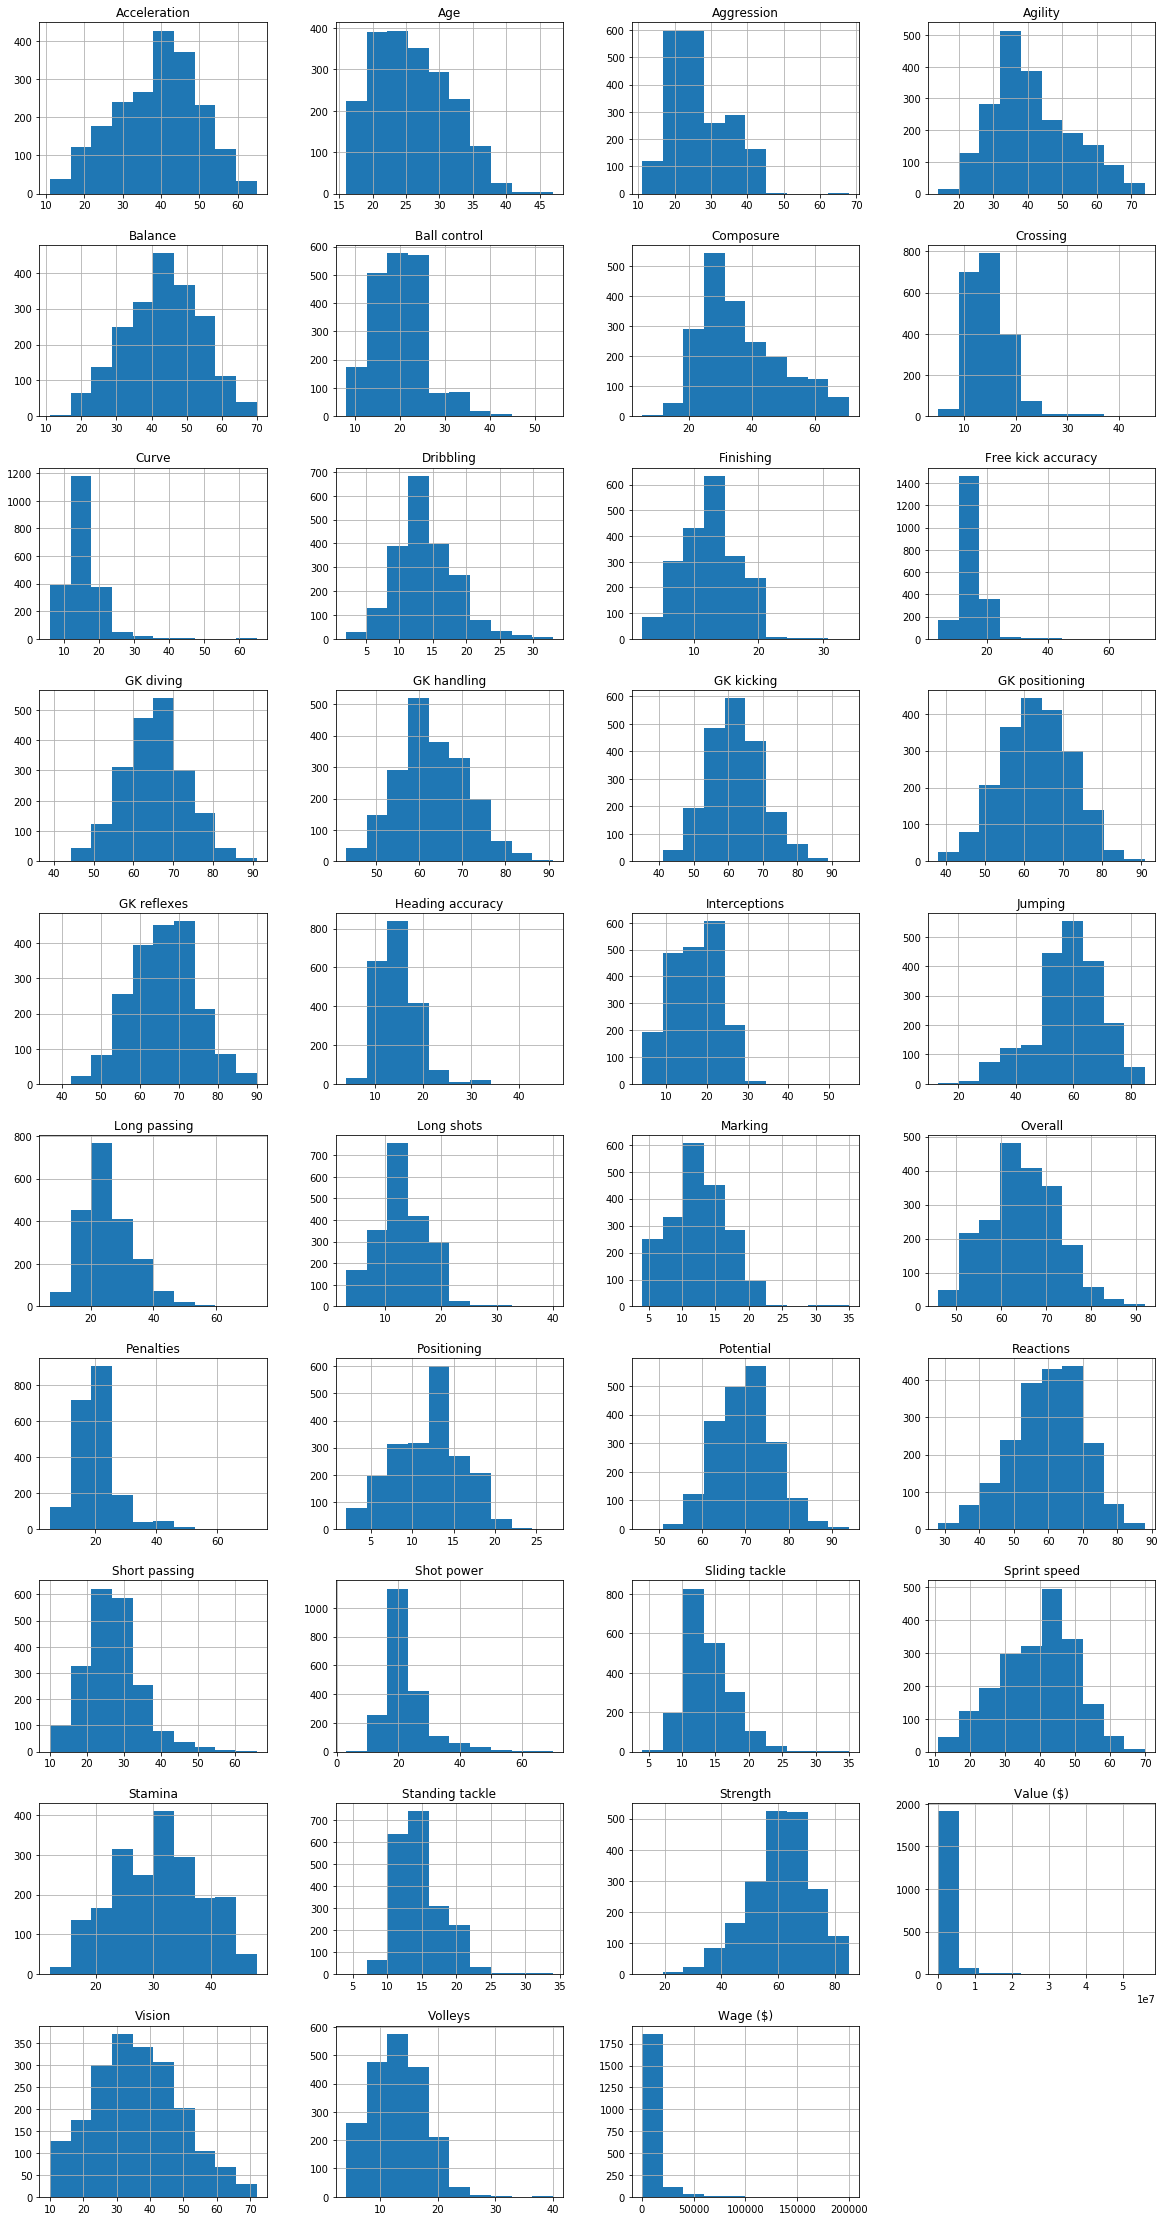

In [13]:
gk.hist(figsize=(20,40), layout = (10,4))
plt.show()

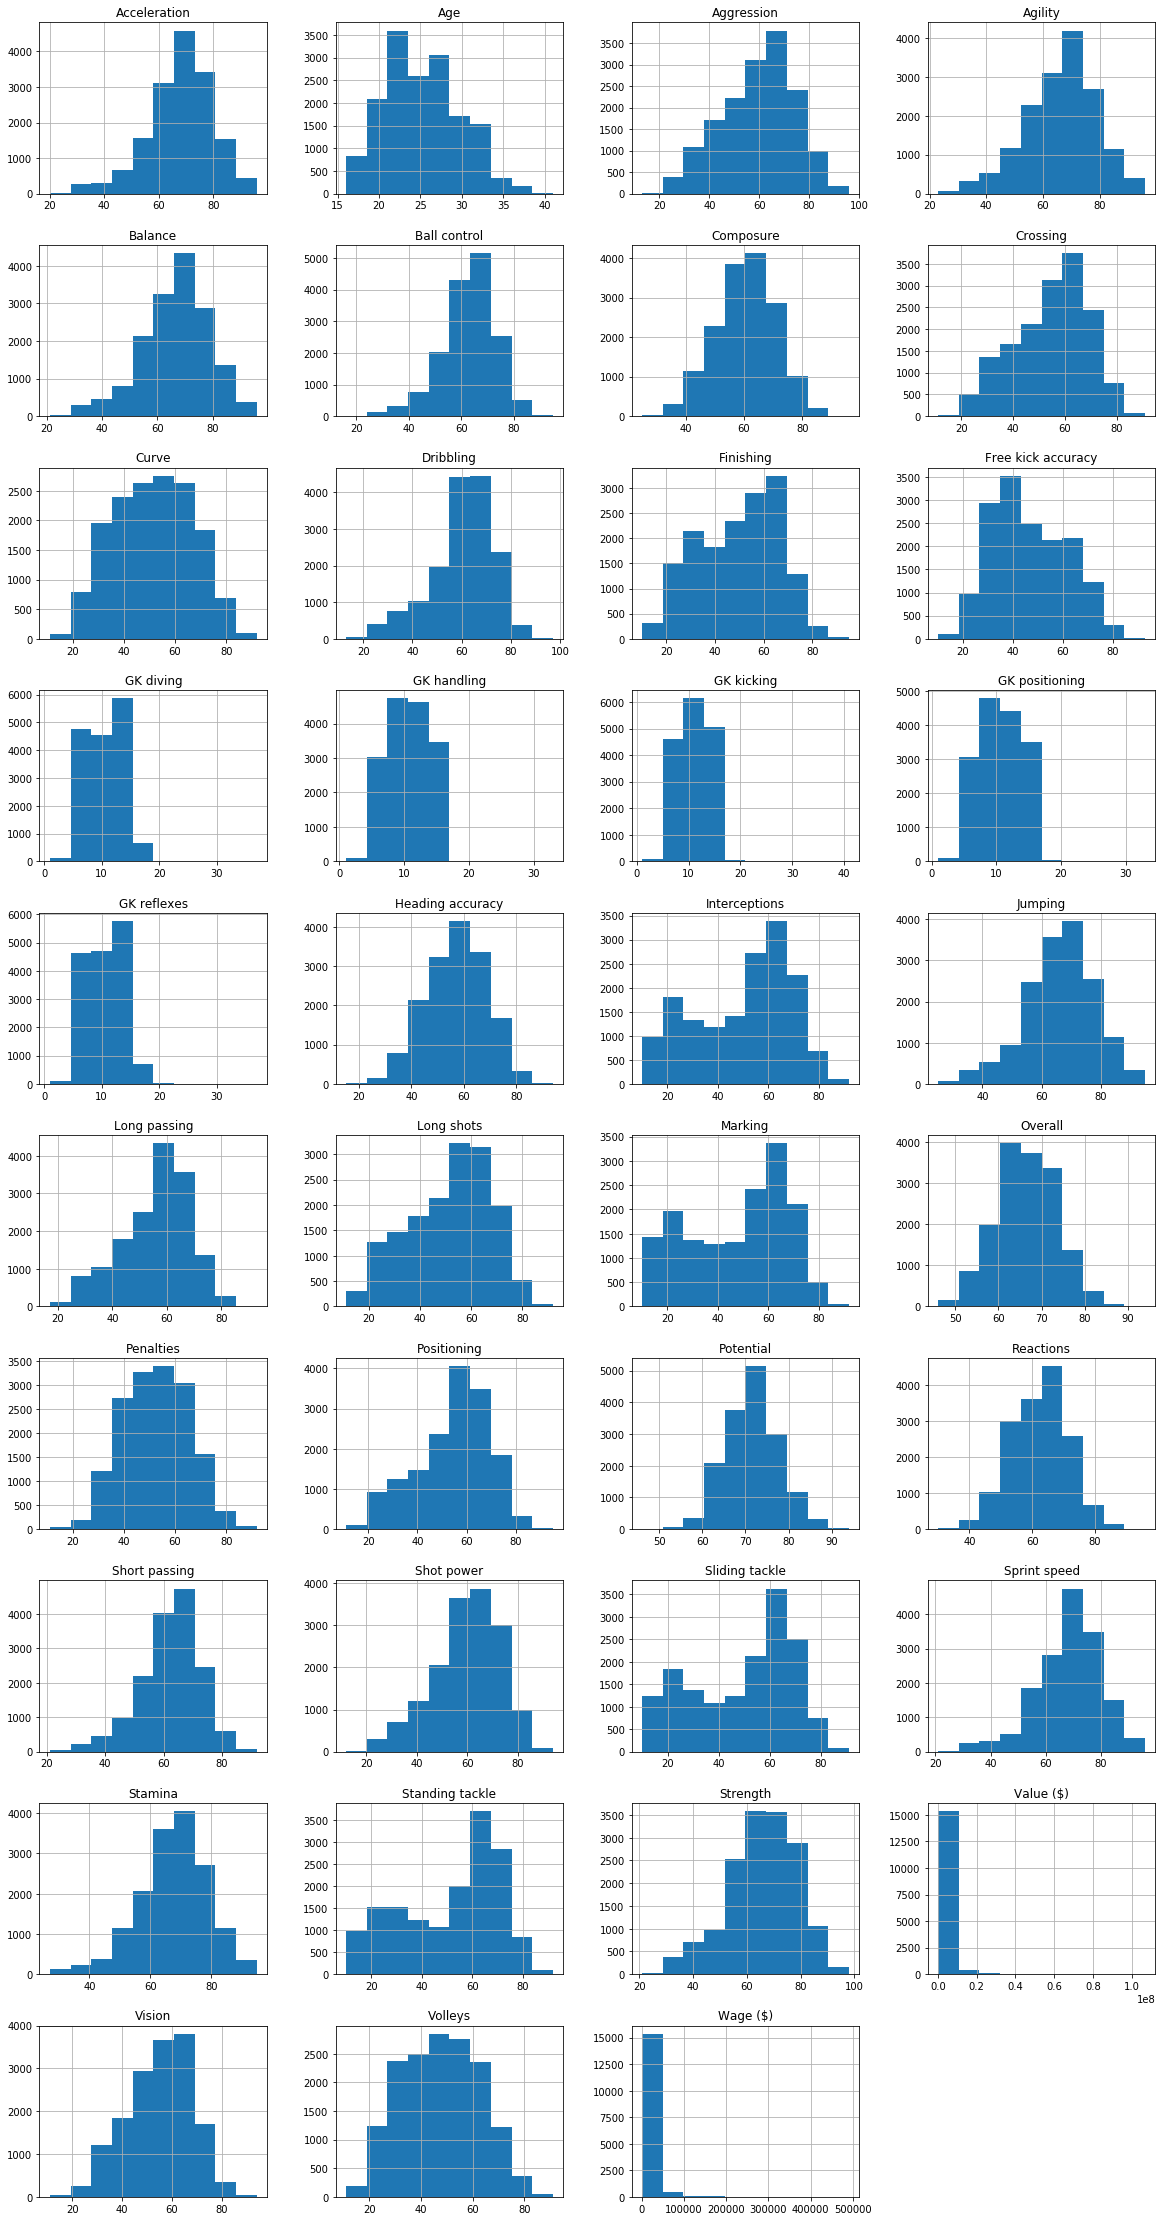

In [14]:
ngk.hist(figsize=(20,40), layout = (10,4))
plt.show()

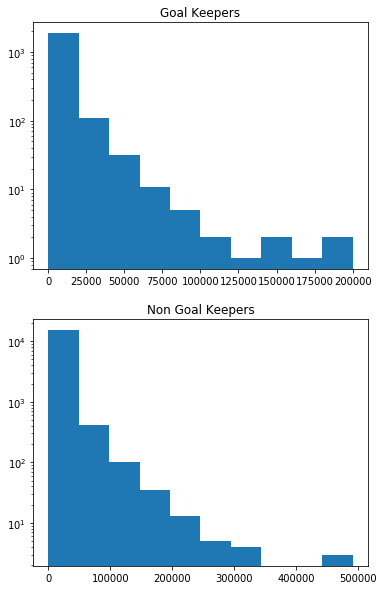

In [15]:
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)
plt.hist(gk['Wage ($)'], log = True)
plt.title('Goal Keepers')
plt.subplot(2,1,2)
plt.hist(ngk['Wage ($)'], log = True)
plt.title('Non Goal Keepers')
plt.show()

On average, a goal keeper gets paid half as much as any other player. 

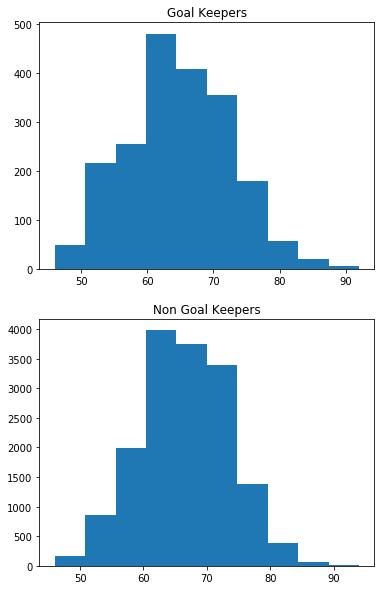

In [16]:
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)
plt.hist(gk['Overall'])
plt.title('Goal Keepers')
plt.subplot(2,1,2)
plt.hist(ngk['Overall'])
plt.title('Non Goal Keepers')
plt.show()

### Plot 1: GK vs. NGK - Wage difference

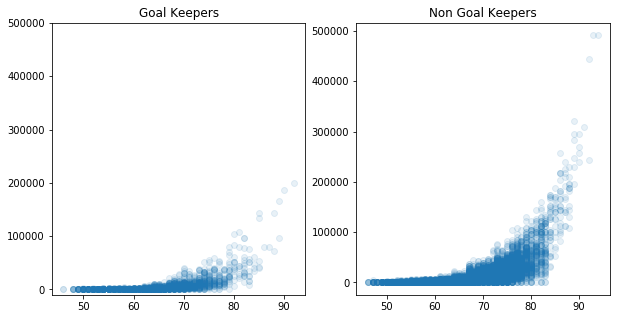

In [17]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(y = gk['Wage ($)'], x = gk['Overall'], alpha = 0.1)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000])
plt.title('Goal Keepers')
plt.subplot(1,2,2)
plt.scatter(y = ngk['Wage ($)'], x = ngk['Overall'], alpha = 0.1)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000])
plt.title('Non Goal Keepers')
plt.show()

In spite of similar overall ratings, the wages are more for non-goalkeepers.

## Age

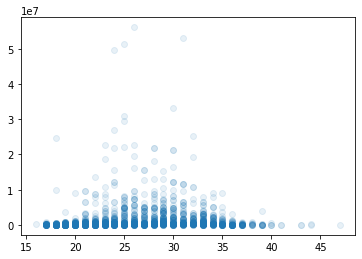

In [18]:
plt.scatter(y = gk['Value ($)'], x = gk['Age'], alpha = 0.1)
#plt.yticks([0, 100000, 200000, 300000, 400000, 500000])
plt.show()

Football is a game for the young? Prime value is for players between 23-30. Players tend to lose value once past 30.

### Plot 2: When to retire? 

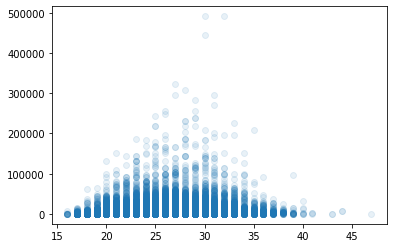

In [19]:
plt.scatter(y = fb['Wage ($)'], x = fb['Age'], alpha = 0.1)
plt.show()

If you are over 35, it's probably wise to move on from the game.

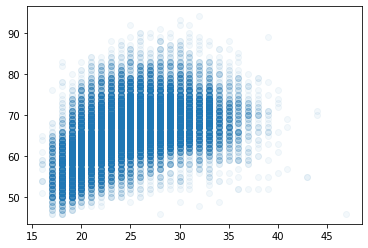

In [20]:
plt.scatter(y = fb['Overall'], x = fb['Age'], alpha = 0.05)
plt.show()

A player's overall score reduces as the age crosses 30 with a peak around 25 years.

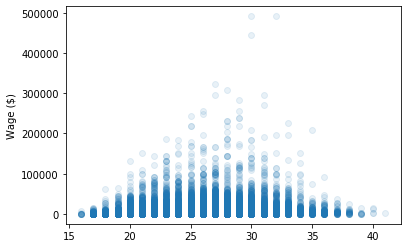

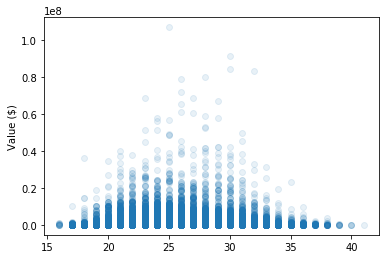

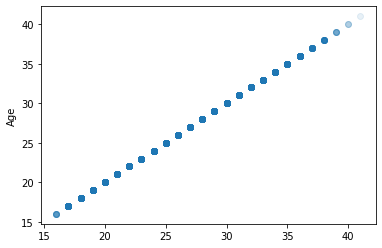

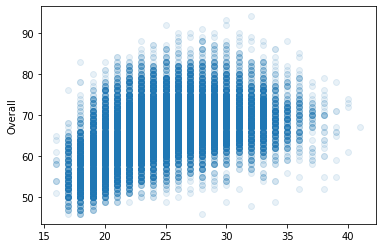

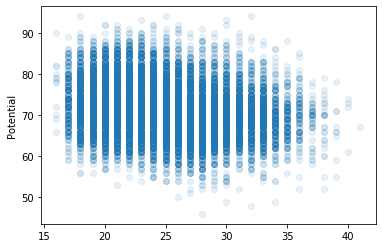

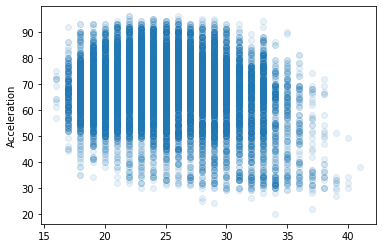

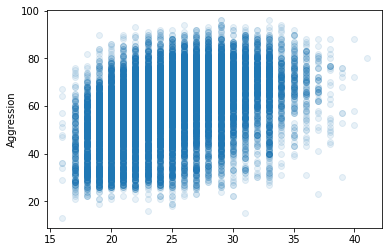

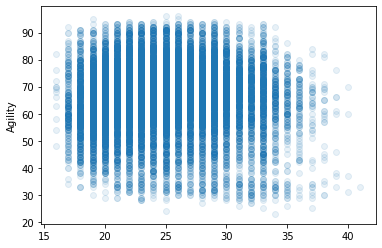

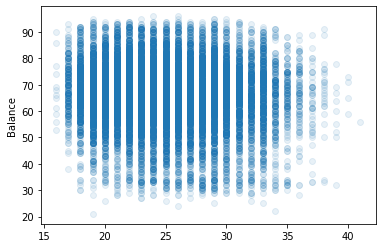

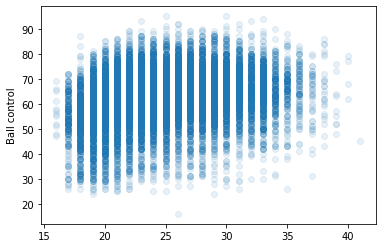

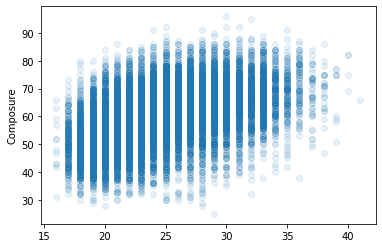

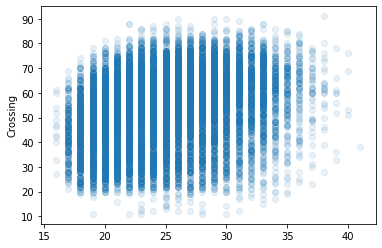

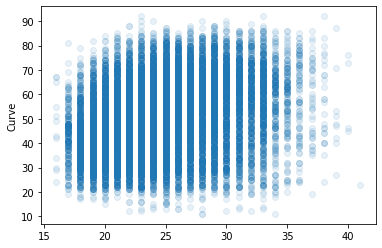

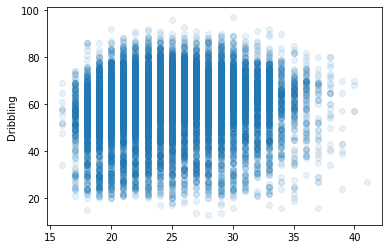

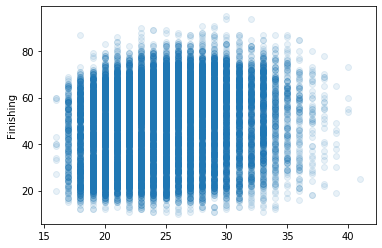

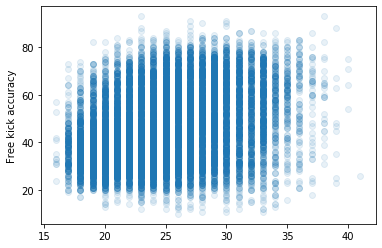

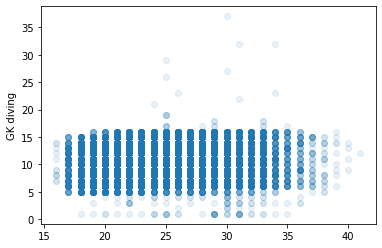

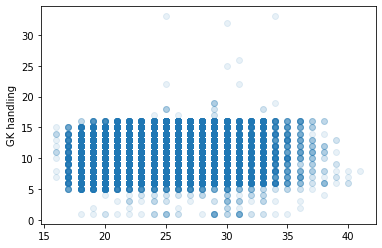

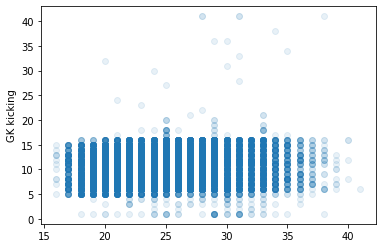

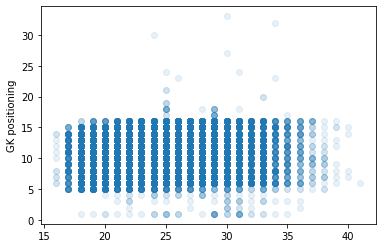

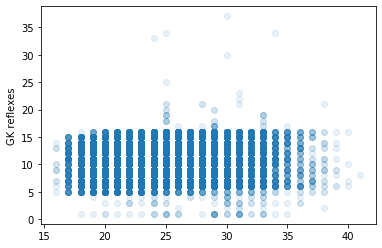

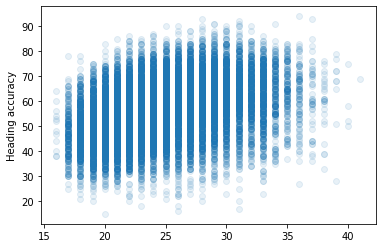

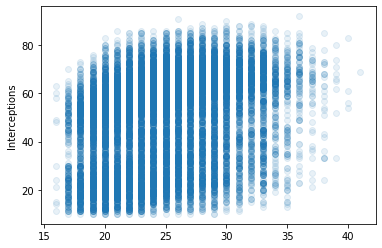

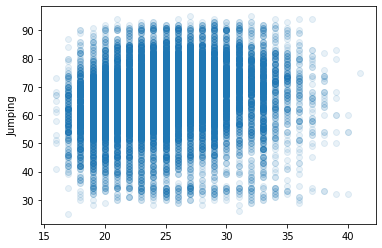

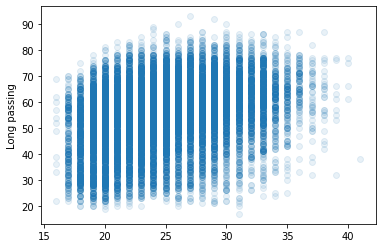

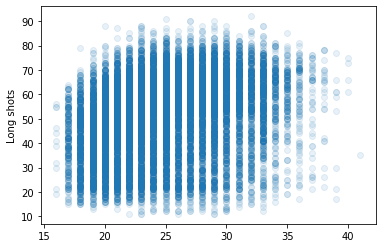

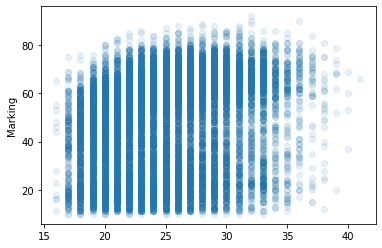

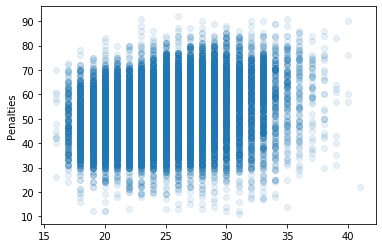

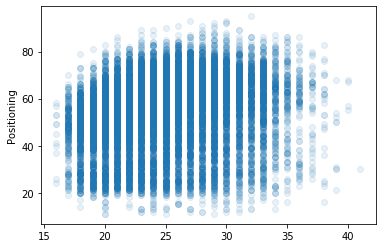

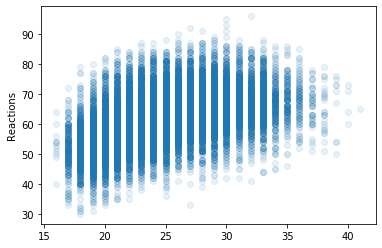

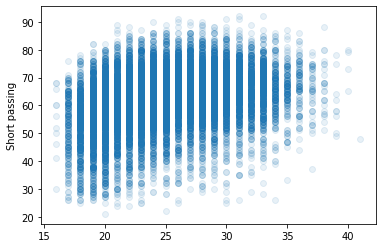

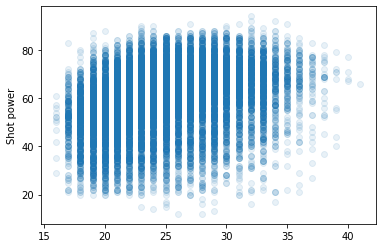

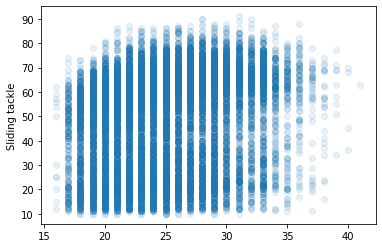

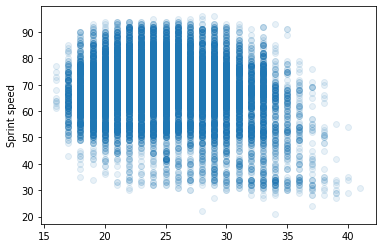

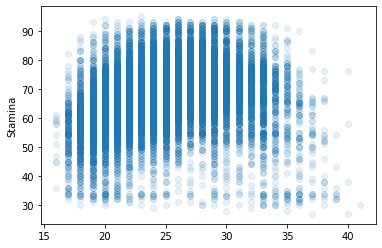

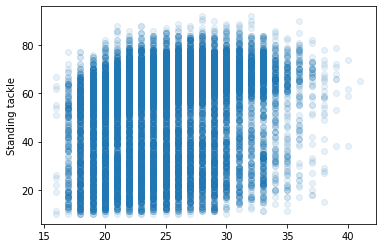

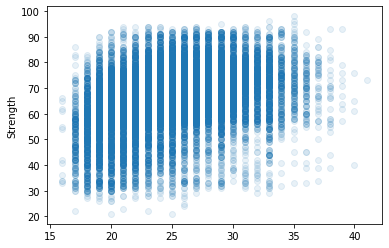

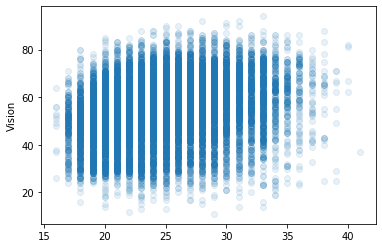

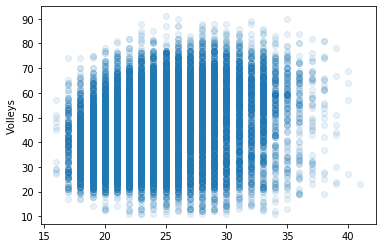

In [21]:
cols = ngk.select_dtypes([np.number]).columns
for col in cols:
    plt.scatter(y = ngk[col], x = ngk['Age'], alpha = 0.1)
    plt.ylabel(col)
    plt.show()

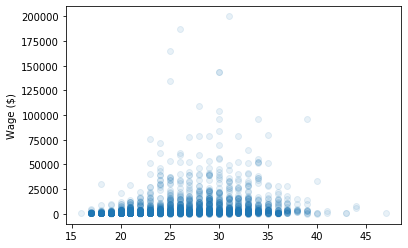

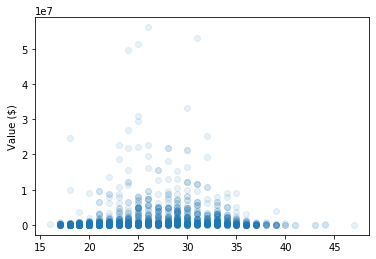

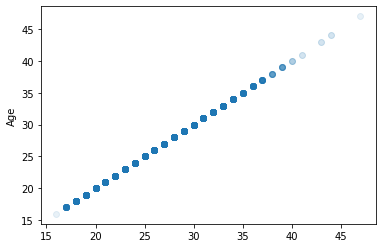

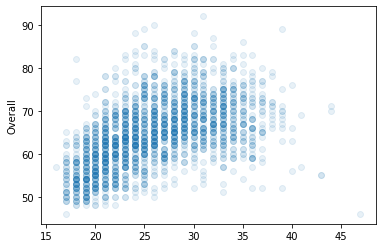

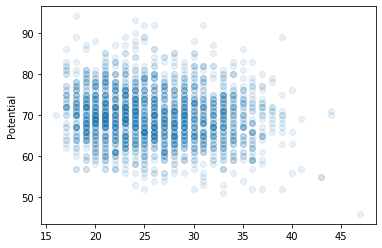

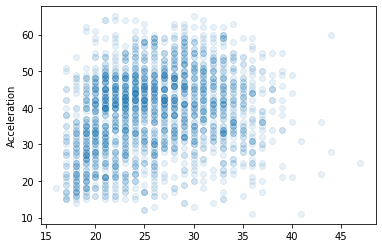

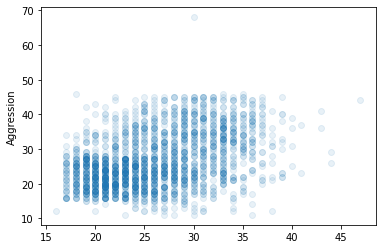

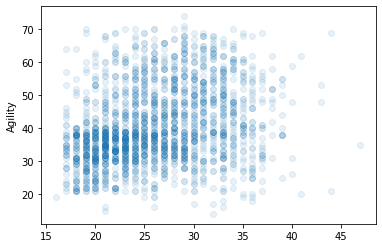

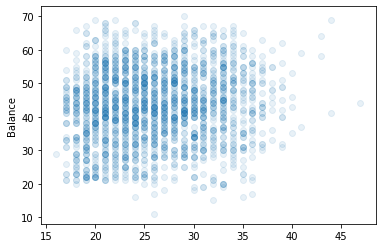

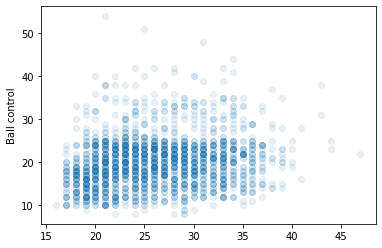

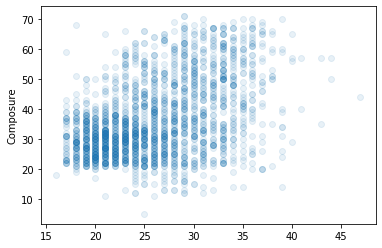

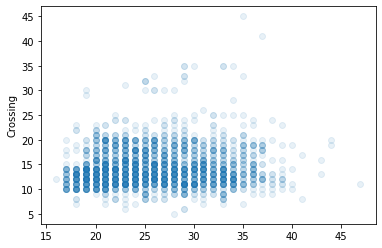

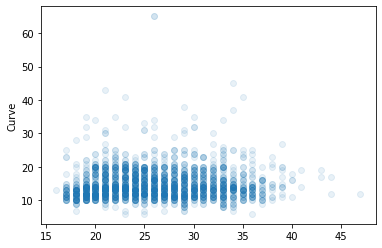

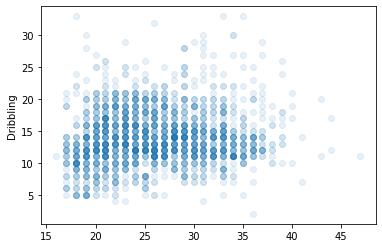

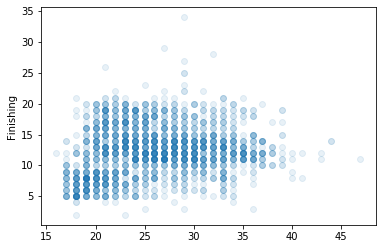

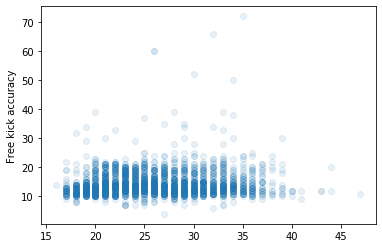

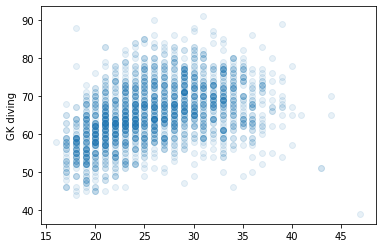

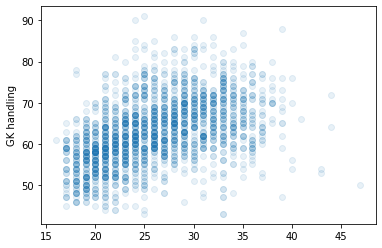

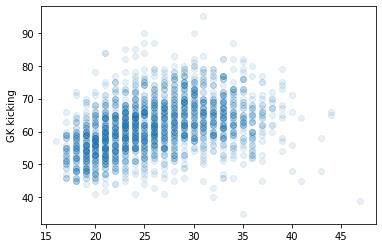

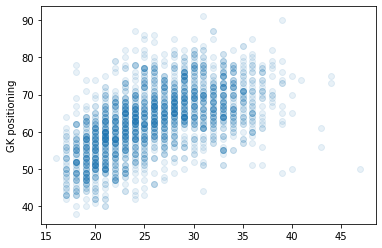

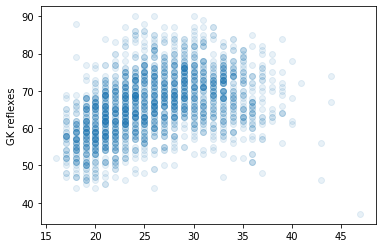

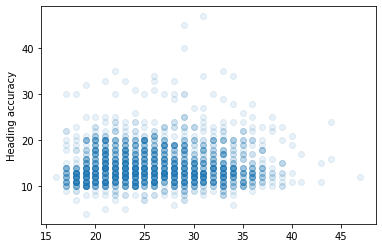

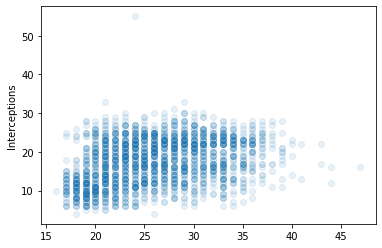

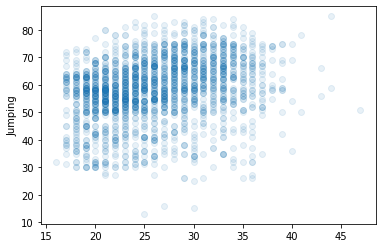

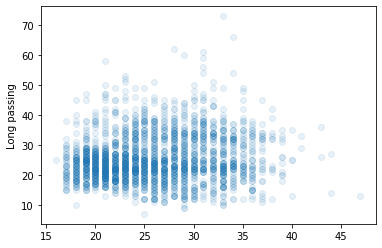

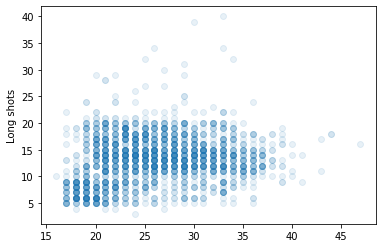

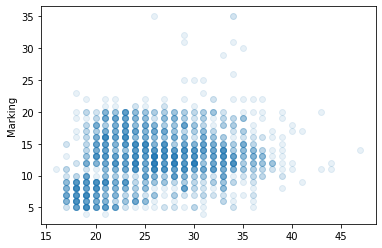

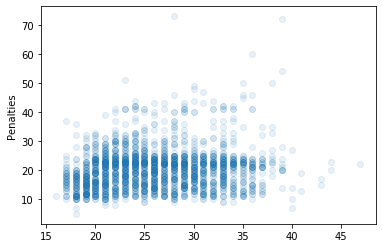

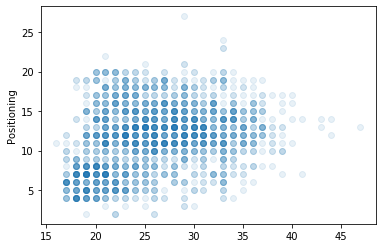

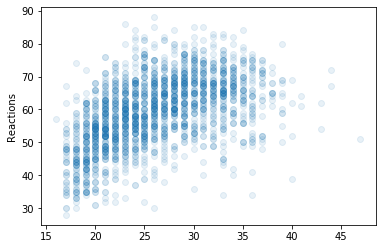

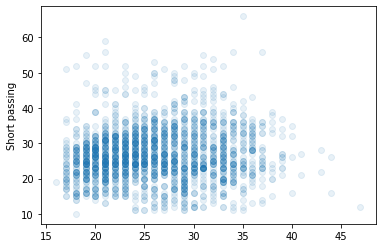

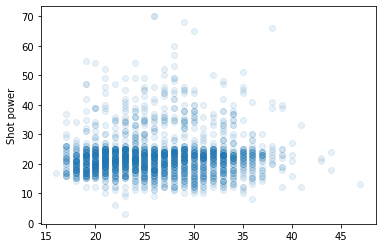

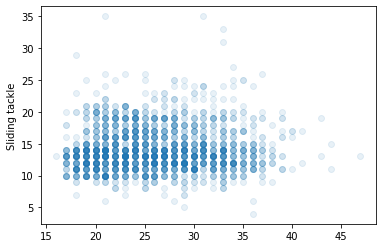

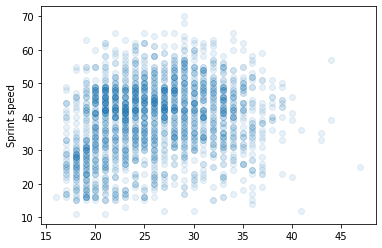

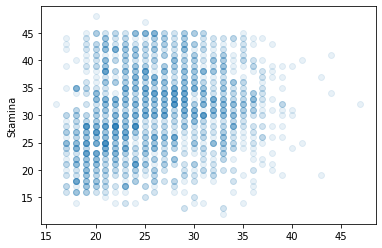

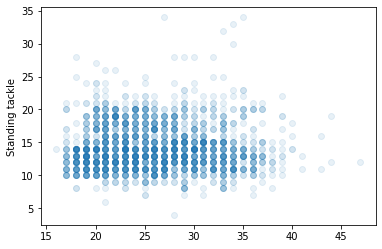

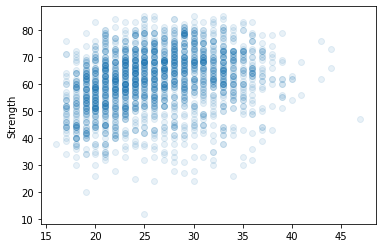

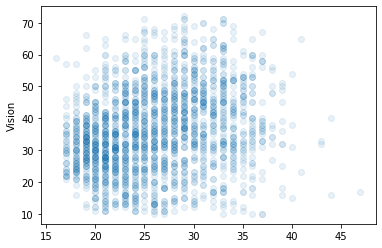

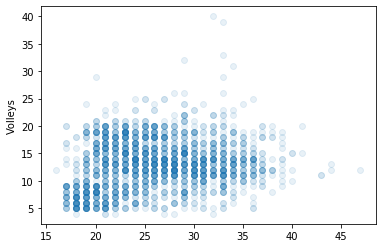

In [22]:
cols = gk.select_dtypes([np.number]).columns
for col in cols:
    plt.scatter(y = gk[col], x = gk['Age'], alpha = 0.1)
    plt.ylabel(col)
    plt.show()

In [23]:
ngk.corr()['Age']

Wage ($)              0.152978
Value ($)             0.085301
Age                   1.000000
Overall               0.462062
Potential            -0.228583
Acceleration         -0.187847
Aggression            0.392642
Agility              -0.010221
Balance              -0.080272
Ball control          0.251328
Composure             0.459235
Crossing              0.273869
Curve                 0.267728
Dribbling             0.099242
Finishing             0.144469
Free kick accuracy    0.318553
GK diving             0.052890
GK handling           0.053995
GK kicking            0.062652
GK positioning        0.056246
GK reflexes           0.055018
Heading accuracy      0.344441
Interceptions         0.289526
Jumping               0.172695
Long passing          0.316436
Long shots            0.270073
Marking               0.226741
Penalties             0.248146
Positioning           0.187493
Reactions             0.468082
Short passing         0.306601
Shot power            0.297510
Sliding 

In [24]:
gk.corr()['Age']

Wage ($)              0.193780
Value ($)             0.075762
Age                   1.000000
Overall               0.504090
Potential            -0.121790
Acceleration          0.216902
Aggression            0.400229
Agility               0.272767
Balance               0.099883
Ball control          0.192893
Composure             0.423075
Crossing              0.084162
Curve                 0.036618
Dribbling             0.106235
Finishing             0.168457
Free kick accuracy    0.086982
GK diving             0.407312
GK handling           0.456050
GK kicking            0.376684
GK positioning        0.554326
GK reflexes           0.404060
Heading accuracy      0.043602
Interceptions         0.318937
Jumping               0.255084
Long passing          0.112597
Long shots            0.186376
Marking               0.223080
Penalties             0.146754
Positioning           0.280452
Reactions             0.503737
Short passing         0.083878
Shot power            0.043184
Sliding 

#### Interesting: 
Overall score increases with age, potential decreases with age.

Composure and Reactions the most positively correlated.

Potential and Acceleration the most negatively correlated. 

Aggression fairly positively correlated, contrary to perception that young players tend to be more aggressive? 

Finishing has no correlation, one would expect more experienced (aged) players to be better finishers.

For GK, their attributes tend to plateau after they reach the age of 30.

## Country

In [25]:
countries = fb['Nationality'].value_counts().head(15).index.tolist()


In [26]:
perf = fb.groupby(['Nationality'])['Overall'].mean()

We have used the mean here because the overall has a small range and there can't be any outliers.

In [27]:
top_perf = []
for country in countries:
    top_perf.append(perf[country])

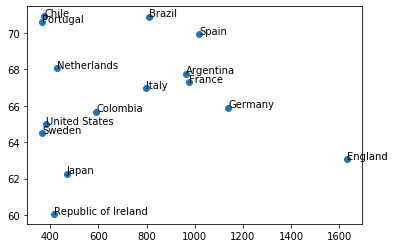

In [28]:
plt.scatter(x = fb['Nationality'].value_counts().head(15), y = top_perf)
for i, country in enumerate(countries):
    plt.annotate(country, (fb['Nationality'].value_counts().head(15)[i], top_perf[i]))

Of the top countries in terms of number of players, Chile, Portugal and Spain have the best players. 

Among European nations, Spain is the country that generates the best talent. Though the volume of players from England is vast, the average overall rating of its players is not much.

In [29]:
wage = fb.groupby(['Nationality'])['Wage ($)'].median()

We are using the median here because there can be a few outliers when it comes to wage

In [30]:
top_wage = []
for country in countries:
    top_wage.append(wage[country])

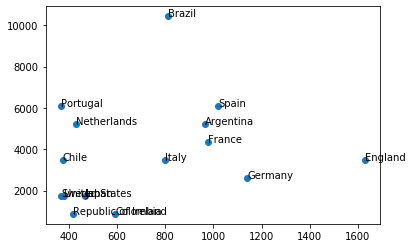

In [31]:
plt.scatter(x = fb['Nationality'].value_counts().head(15), y = top_wage)
for i, country in enumerate(countries):
    plt.annotate(country, (fb['Nationality'].value_counts().head(15)[i], top_wage[i]))

Interesting to note is the fact that despite producing the best players, the median wage for Chilean players is lower than many other countries and is comparable to England, whose players are only  better than Japan and Ireland.

Brazilians enjoy high median wages compared to other top countries. 

Columbians, despite performing better than most other countries in this list, aren't getting high wages. Their wages are equal to those from Ireland, whose overall rating is 6 notches lower.

In [32]:
cage = fb.groupby(['Nationality'])['Age'].mean()
for country in countries:
    print(country, cage[country])

England 23.91963190184049
Germany 24.20263157894737
Spain 25.211972522080472
France 24.634969325153374
Argentina 25.932642487046632
Brazil 27.208128078817733
Italy 25.619524405506883
Colombia 25.388513513513512
Japan 26.56503198294243
Netherlands 24.027972027972027
Republic of Ireland 24.690647482014388
United States 25.27296587926509
Chile 28.72533333333333
Sweden 25.119565217391305
Portugal 25.26158038147139


Players from England and the Netherlands are the youngest of the lot. On average, players from Chile are almost 4 years older than englishmen. England is the 'youngsters hub'?

On the other hand, Chilean are the best performers, which can be die to the fact that since they are older, they are more mature and they know their games and are each at their peak prowess. In Brazil as well, the average age is higher as is the performance. 

One interesting point of note is that players from the Netherlands are among the youngest but they are also the best performers. On the other hand, England players are young but not quite the best performers. Maybe something to do with the football culture?


## Best players in different categories

#### Strikers: 


In [33]:
fb['Preferred Positions'].unique()

array(['ST LW', 'RW', 'LW', 'ST', 'GK', 'CDM CM', 'CB', 'RM CM CAM',
       'RM LW ST LM', 'ST CAM', 'LW RW ST', 'CDM CAM CM', 'RW CAM',
       'RW RM', 'CM CDM', 'LM RM CAM', 'LB', 'CM', 'LM CM CAM', 'LM CM',
       'LM RM CAM CM', 'CM CB LB', 'LM LB', 'ST CAM RW CF', 'CAM LW',
       'LW ST LM', 'CAM CM', 'CDM CB', 'ST LW CF', 'CAM CDM CM', 'LW LM',
       'RM LM', 'CDM', 'LM RW RM', 'LB RB CB', 'LW RW', 'LW LM RM CAM',
       'RM', 'LM CF CAM', 'RB', 'LM CAM LW', 'LM RM CM', 'CAM LM',
       'CAM RM RW', 'RM CAM', 'CAM LW RW', 'LM', 'LM CAM', 'CAM CF ST',
       'CM CB CDM', 'RW ST', 'RW LW CM', 'CF CAM', 'LW CM', 'RWB RB',
       'CAM', 'ST CF', 'LM ST', 'CM CAM', 'CF ST', 'CB RB', 'CF CM CAM',
       'LM CAM RW LW', 'LM RM', 'LM RW LW', 'LM CF RM', 'CAM LW CM',
       'ST LM', 'LM ST RM', 'RM RW', 'RM CM', 'RB CB', 'CM RW RB',
       'LM RM RW', 'RW LW', 'CM CDM CB', 'LB CB', 'ST RM LM', 'CAM LM CM',
       'CB CDM', 'CAM CM CDM', 'CAM CF', 'RM CDM CM', 'LW RM LM',
       'CAM ST 

In [34]:
st = fb.loc[fb['Preferred Positions'].str.contains('ST')]
nst = fb.loc[fb['Preferred Positions'].str.contains('GK')==False]
w = fb.loc[fb['Preferred Positions'].str.contains('W')]
nw = fb.loc[fb['Preferred Positions'].str.contains('W')==False]
m = fb.loc[fb['Preferred Positions'].str.contains('M')]
nm = fb.loc[fb['Preferred Positions'].str.contains('M')==False]
b = fb.loc[fb['Preferred Positions'].str.contains('B')]
nb = fb.loc[fb['Preferred Positions'].str.contains('B')==False]
f = fb.loc[fb['Preferred Positions'].str.contains('F')]
nf = fb.loc[fb['Preferred Positions'].str.contains('F')==False]

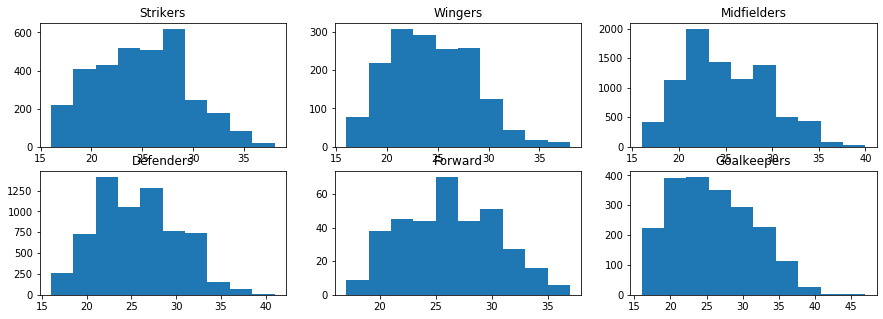

In [35]:
plt.figure(figsize = (15,5))
plt.subplot(2,3,1)
plt.hist(st['Age'])
plt.title('Strikers')
plt.subplot(2,3,2)
plt.hist(w['Age'])
plt.title('Wingers')

plt.subplot(2,3,3)
plt.hist(m['Age'])
plt.title('Midfielders')

plt.subplot(2,3,4)
plt.hist(b['Age'])
plt.title('Defenders')

plt.subplot(2,3,5)
plt.hist(f['Age'])
plt.title('Forward')

plt.subplot(2,3,6)
plt.hist(gk['Age'])
plt.title('Goalkeepers')

plt.show()

In [36]:
print(st['Age'].mean())

print(w['Age'].mean())
print(m['Age'].mean())
print(b['Age'].mean())
print(f['Age'].mean())
print(gk["Age"].mean())

24.887542715128923
24.302803738317756
24.918554160309824
25.451987010978815
25.68285714285714
26.07737801872844


Among all players, if we look at the age and their position, wingers are the youngest crop and goalkeepers are the oldest crop. Defenders and forwards are on average older than players at other positions, maybe for their higher composure? 

#### Strikers

C:\Users\prana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prana\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


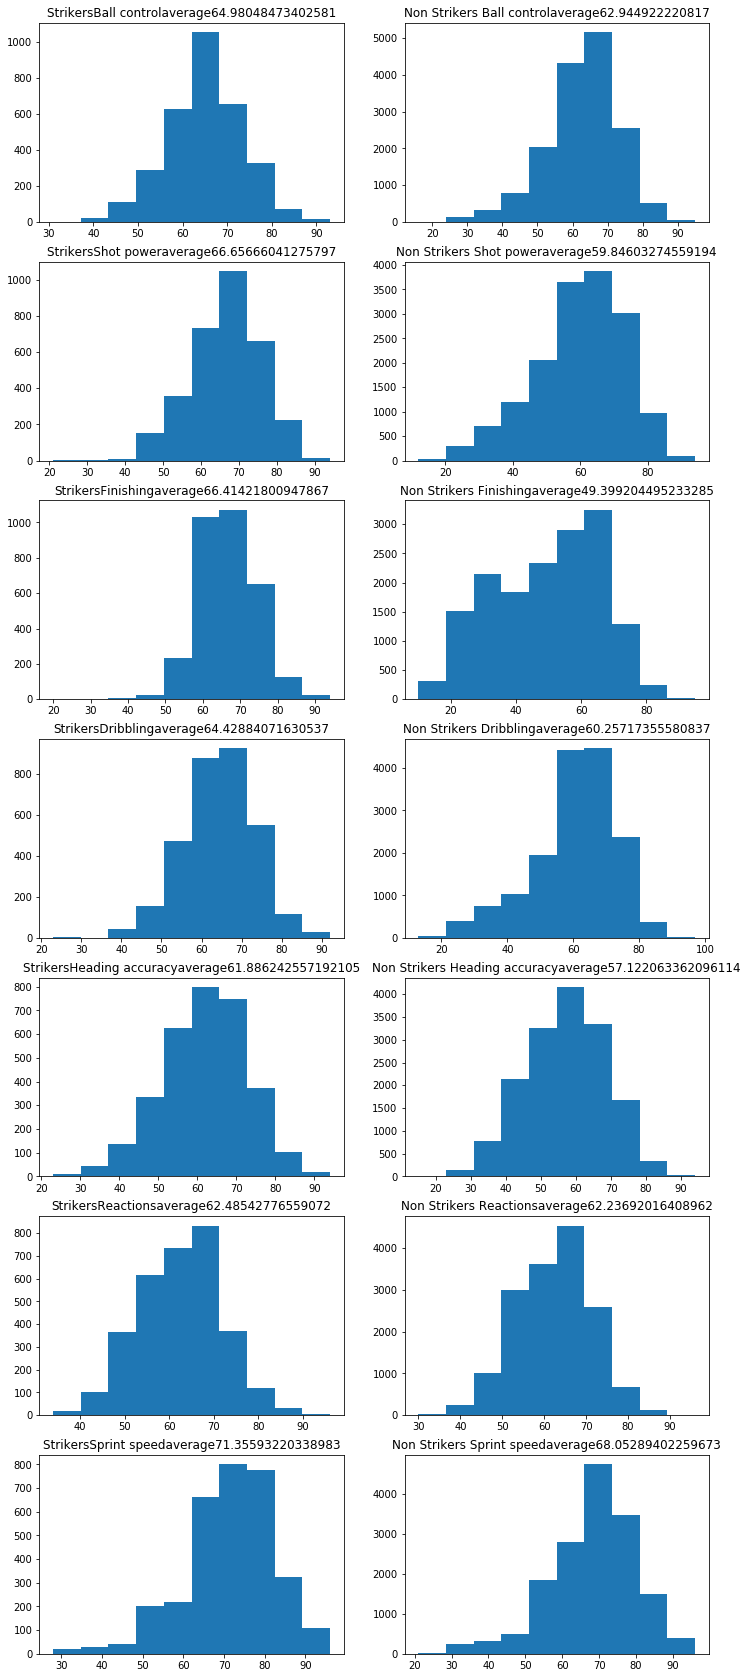

In [37]:
sttr = ['Ball control', 'Shot power', 'Finishing', 'Dribbling', 'Heading accuracy', 'Reactions', 'Sprint speed']
i = 1
plt.figure(figsize = (12, 30))
for attr in sttr:
    plt.subplot(7,2,i)
    plt.hist(st[attr])
    plt.title('Strikers'+ attr + 'average' + str(st[attr].mean()))
    i = i +1
    plt.subplot(7,2,i)
    plt.hist(nst[attr])
    plt.title('Non Strikers '+ attr + 'average' + str(nst[attr].mean()))
    i = i + 1
plt.show()



In [38]:
st.describe()

Wage ($)     Value ($)          Age      Overall    Potential  \
count    3219.000000  3.219000e+03  3219.000000  3219.000000  3219.000000   
mean    11386.545822  2.429160e+06    24.887543    66.336129    71.337683   
std     23535.769482  5.574126e+06     4.456589     6.917347     6.053160   
min         0.000000  0.000000e+00    16.000000    46.000000    52.000000   
25%      1739.000000  3.260870e+05    21.000000    62.000000    67.000000   
50%      4348.000000  6.956520e+05    25.000000    66.000000    71.000000   
75%     12174.000000  2.173913e+06    28.000000    71.000000    75.000000   
max    491304.000000  8.434783e+07    38.000000    94.000000    94.000000   

       Acceleration   Aggression      Agility      Balance  Ball control  \
count   3191.000000  3202.000000  3202.000000  3200.000000   3177.000000   
mean      70.733939    52.503748    68.330418    65.552188     64.980485   
std       11.466991    15.614063    11.336003    11.990609      8.459468   
min       26.000000    18.000000    29.000000    28.000000     31.000000   
25%       64.000000    39.000000    61.000000    59.000000     60.000000   
50%       72.000000    53.000000    69.000000    66.000000     65.000000   
75%       78.000000    64.000000    76.000000    74.000000     71.000000   
max       96.000000    94.000000    95.000000    95.000000     93.000000   

         Composure     Crossing        Curve    Dribbling    Finishing  \
count  3191.000000  3198.000000  3203.000000  3183.000000  3165.000000   
mean     61.086807    49.665416    53.079301    64.428841    66.414218   
std       9.880143    13.513116    12.836208     8.893949     7.679705   
min      30.000000    11.000000    17.000000    23.000000    20.000000   
25%      54.000000    38.000000    43.000000    59.000000    61.000000   
50%      61.000000    51.000000    53.000000    65.000000    66.000000   
75%      68.000000    60.000000    63.000000    71.000000    72.000000   
max      95.000000    85.000000    90.000000    92.000000    94.000000   

       Free kick accuracy    GK diving  GK handling   GK kicking  \
count         3211.000000  3219.000000  3219.000000  3219.000000   
mean            46.371224    10.552656    10.647717    10.679714   
std             13.929881     3.146803     3.106585     3.260151   
min             17.000000     1.000000     1.000000     1.000000   
25%             34.000000     8.000000     8.000000     8.000000   
50%             45.000000    11.000000    11.000000    11.000000   
75%             57.000000    13.000000    13.000000    13.000000   
max             89.000000    32.000000    33.000000    41.000000   

       GK positioning  GK reflexes  Heading accuracy  Interceptions  \
count     3219.000000  3219.000000       3191.000000    3212.000000   
mean        10.550792    10.609506         61.886243      27.715442   
std          3.139320     3.227453         10.629257      11.556153   
min          1.000000     1.000000         23.000000      10.000000   
25%          8.000000     8.000000         55.000000      19.000000   
50%         10.000000    11.000000         63.000000      25.000000   
75%         13.000000    13.000000         69.000000      35.000000   
max         33.000000    37.000000         94.000000      74.000000   

           Jumping  Long passing   Long shots      Marking    Penalties  \
count  3202.000000   3199.000000  3195.000000  3213.000000  3207.000000   
mean     67.267021     46.997187    60.019718    23.818861    62.699096   
std      11.308609     11.841630     9.055692     9.880018     8.700547   
min      25.000000     17.000000    17.000000    10.000000    21.000000   
25%      61.000000     38.000000    54.000000    17.000000    57.000000   
50%      68.000000     47.000000    60.000000    22.000000    63.000000   
75%      75.000000     56.000000    66.000000    29.000000    69.000000   
max      95.000000     82.000000    92.000000    72.000000    92.000000   

       Positioning    Reactions  Shor

In [39]:
nst.describe()

Wage ($)     Value ($)           Age       Overall     Potential  \
count   15952.000000  1.595200e+04  15952.000000  15952.000000  15952.000000   
mean    10449.263415  2.164108e+06     25.025890     66.443581     71.377257   
std     20657.755233  4.752560e+06      4.491526      6.866209      6.032042   
min         0.000000  0.000000e+00     16.000000     46.000000     46.000000   
25%      1739.000000  3.043480e+05     21.000000     62.000000     67.000000   
50%      3478.000000  6.304350e+05     25.000000     66.000000     71.000000   
75%     10435.000000  1.913043e+06     28.000000     71.000000     75.000000   
max    491304.000000  1.069565e+08     41.000000     94.000000     94.000000   

       Acceleration    Aggression       Agility       Balance  Ball control  \
count  15872.000000  15885.000000  15885.000000  15899.000000  15814.000000   
mean      67.853327     59.502990     66.223796     66.417385     62.944922   
std       11.863936     14.658002     12.498490     12.194992     10.309714   
min       20.000000     13.000000     23.000000     21.000000     16.000000   
25%       62.000000     49.000000     59.000000     59.000000     57.000000   
50%       69.000000     61.000000     67.000000     67.000000     64.000000   
75%       76.000000     70.000000     75.000000     75.000000     70.000000   
max       96.000000     96.000000     96.000000     96.000000     95.000000   

          Composure      Crossing         Curve     Dribbling     Finishing  \
count  15860.000000  15856.000000  15879.000000  15822.000000  15839.000000   
mean      60.606494     54.244765     51.402733     60.257174     49.399204   
std       10.113409     14.243504     15.179660     12.773707     16.446707   
min       25.000000     11.000000     11.000000     13.000000     10.000000   
25%       54.000000     44.000000     40.000000     54.000000     36.000000   
50%       61.000000     57.000000     52.000000     62.000000     52.000000   
75%       68.000000     65.000000     63.000000     69.000000     63.000000   
max       96.000000     91.000000     92.000000     97.000000     95.000000   

       Free kick accuracy     GK diving   GK handling    GK kicking  \
count        15904.000000  15952.000000  15952.000000  15952.000000   
mean            46.777226     10.552783     10.612776     10.646063   
std             15.098869      3.130072      3.111083      3.211025   
min             10.000000      1.000000      1.000000      1.000000   
25%             34.000000      8.000000      8.000000      8.000000   
50%             45.000000     11.000000     11.000000     11.000000   
75%             59.000000     13.000000     13.000000     13.000000   
max             93.000000     37.000000     33.000000     41.000000   

       GK positioning   GK reflexes  Heading accuracy  Interceptions  \
count    15952.000000  15952.000000      15877.000000   15855.000000   
mean        10.577106     10.585193         57.122063      50.200442   
std          3.130409      3.141594         11.633181      18.913127   
min          1.000000      1.000000         15.000000      10.000000   
25%          8.000000      8.000000         49.000000      33.000000   
50%         10.000000     11.000000         58.000000      55.000000   
75%         13.000000     13.000000         66.000000      65.000000   
max         33.000000     37.000000         94.000000      92.000000   

            Jumping  Long passing    Long shots       Marking     Penalties  \
count  15889.000000  15832.000000  15870.000000  15841.000000  15923.000000   
mean      65.736358     55.844429     51.499307     48.019569     52.607737   
std       11.671223     12.656199     15.835517     19.550126     12.599225   
min       25.000000     17.000000     11.000000     10.000000     11.000000   
25%       59.000000     48.000000     40.000000     30.000000     43.000000   
50%       67.000000     58.000000     54.000000     53.000000     53.000000   
75%       74.000000     6

Strikers are on average two shots stronger. One would expect those big and burly to be stronger but that is not the case. 

#### Defenders

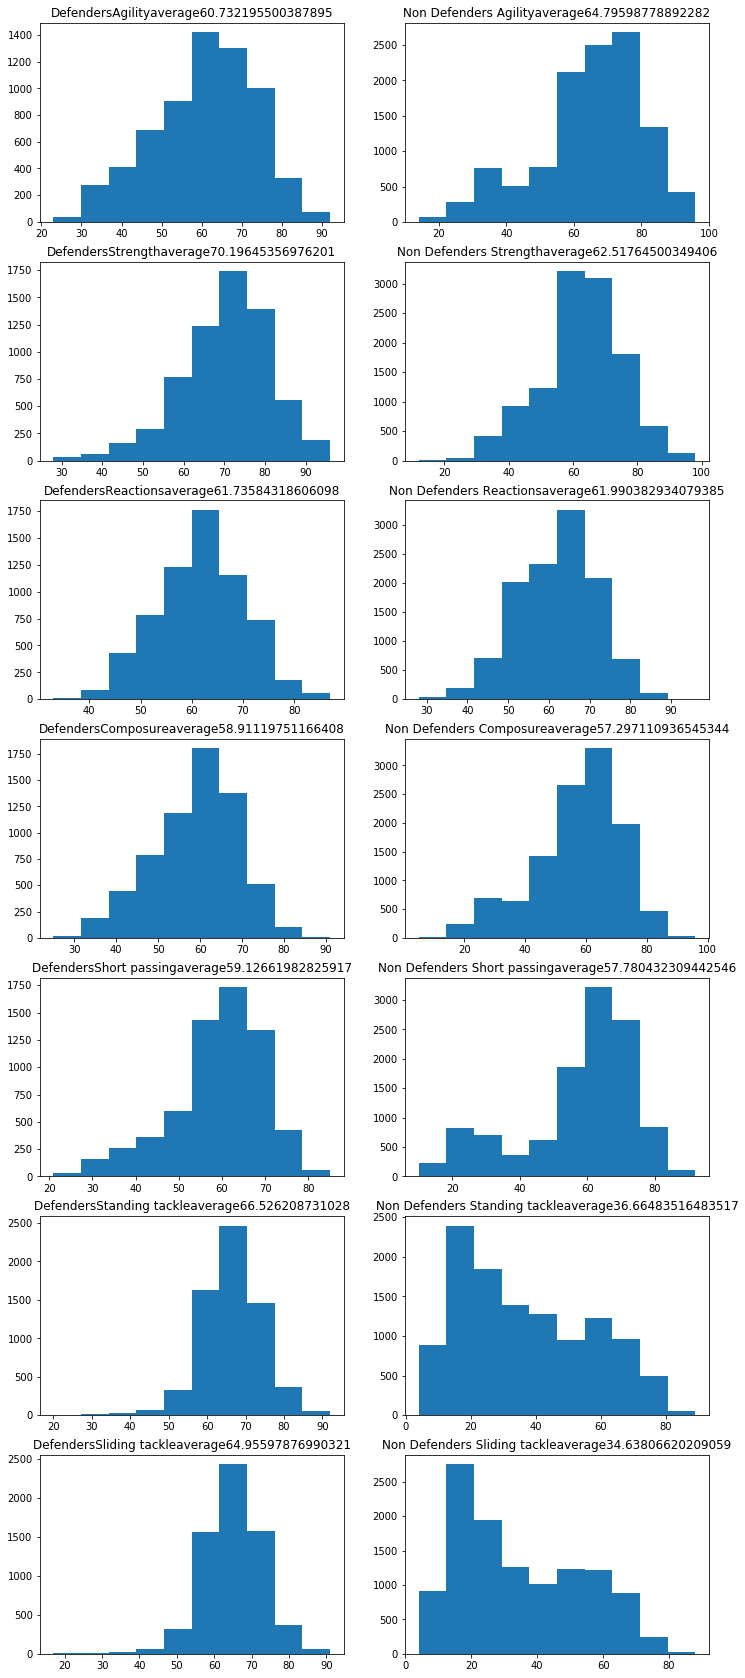

In [40]:
dtr = ['Agility', 'Strength', 'Reactions', 'Composure', 'Short passing', 'Standing tackle', 'Sliding tackle']

i = 1
plt.figure(figsize = (12, 30))
for attr in dtr:
    plt.subplot(7,2,i)
    plt.hist(b[attr])
    plt.title('Defenders'+ attr + 'average' + str(b[attr].mean()))
    i = i +1
    plt.subplot(7,2,i)
    plt.hist(nb[attr])
    plt.title('Non Defenders '+ attr + 'average' + str(nb[attr].mean()))
    i = i + 1
plt.show()

In [41]:
b.describe()

Wage ($)     Value ($)          Age      Overall    Potential  \
count    6467.000000  6.467000e+03  6467.000000  6467.000000  6467.000000   
mean     9565.043761  1.718264e+06    25.451987    66.416113    70.921757   
std     17407.285969  3.418199e+06     4.480184     6.572695     5.783233   
min         0.000000  0.000000e+00    16.000000    46.000000    49.000000   
25%      1739.000000  2.608700e+05    22.000000    62.000000    67.000000   
50%      3478.000000  5.652170e+05    25.000000    66.000000    71.000000   
75%     10435.000000  1.565217e+06    29.000000    71.000000    75.000000   
max    269565.000000  4.521739e+07    41.000000    90.000000    92.000000   

       Acceleration   Aggression      Agility      Balance  Ball control  \
count   6442.000000  6438.000000  6445.000000  6451.000000   6415.000000   
mean      64.668426    65.397328    60.732196    61.974268     57.839906   
std       12.471173    11.089014    12.841087    12.327569     10.895374   
min       20.000000    22.000000    23.000000    21.000000     16.000000   
25%       57.000000    58.000000    52.000000    55.000000     51.000000   
50%       66.000000    66.000000    62.000000    63.000000     59.000000   
75%       74.000000    73.000000    70.000000    71.000000     65.000000   
max       96.000000    96.000000    92.000000    95.000000     88.000000   

         Composure     Crossing        Curve    Dribbling    Finishing  \
count  6430.000000  6434.000000  6446.000000  6432.000000  6449.000000   
mean     58.911198    51.802145    44.388768    52.713308    36.008839   
std      10.129511    16.066864    15.341723    13.783041    12.658098   
min      25.000000    11.000000    11.000000    13.000000    10.000000   
25%      52.000000    38.000000    31.000000    43.000000    26.000000   
50%      60.000000    55.000000    42.000000    55.000000    34.000000   
75%      66.000000    65.000000    57.000000    63.000000    45.000000   
max      91.000000    90.000000    86.000000    85.000000    77.000000   

       Free kick accuracy    GK diving  GK handling   GK kicking  \
count         6452.000000  6467.000000  6467.000000  6467.000000   
mean            40.166150    10.587444    10.577702    10.591619   
std             14.115815     3.087629     3.088641     3.233334   
min             10.000000     1.000000     1.000000     1.000000   
25%             30.000000     8.000000     8.000000     8.000000   
50%             37.000000    11.000000    10.000000    11.000000   
75%             49.000000    13.000000    13.000000    13.000000   
max             85.000000    32.000000    33.000000    41.000000   

       GK positioning  GK reflexes  Heading accuracy  Interceptions  \
count     6467.000000  6467.000000       6433.000000    6412.000000   
mean        10.609092    10.564559         60.573916      63.468808   
std          3.141320     3.111392         10.281993       8.792241   
min          1.000000     1.000000         21.000000      20.000000   
25%          8.000000     8.000000         54.000000      58.000000   
50%         11.000000    10.000000         61.000000      64.000000   
75%         13.000000    13.000000         68.000000      69.000000   
max         32.000000    34.000000         92.000000      92.000000   

           Jumping  Long passing   Long shots      Marking    Penalties  \
count  6439.000000   6412.000000  6453.000000  6388.000000  6462.000000   
mean     68.606927     53.907673    41.082907    63.782091    44.589910   
std      10.785938     12.504308    15.578734     8.731120    11.102645   
min      28.000000     20.000000    11.000000    18.000000    11.000000   
25%      62.000000     46.000000    28.000000    59.000000    37.000000   
50%      70.000000     56.000000    39.000000    64.000000    43.000000   
75%      75.000000     63.000000    53.000000    70.000000    51.000000   
max      95.000000     87.000000    88.000000    92.000000    90.000000   

       Positioning    Reactions  Shor

In [42]:
nb.describe()

Wage ($)     Value ($)           Age       Overall     Potential  \
count   11514.000000  1.151400e+04  11514.000000  11514.000000  11514.000000   
mean    10308.229460  2.274197e+06     24.971860     66.153552     71.341932   
std     21416.255043  5.213123e+06      4.679244      7.209287      6.269428   
min         0.000000  0.000000e+00     16.000000     46.000000     46.000000   
25%      1739.000000  2.608700e+05     21.000000     61.000000     67.000000   
50%      3478.000000  6.304350e+05     25.000000     66.000000     71.000000   
75%     10435.000000  2.000000e+06     28.000000     71.000000     75.000000   
max    491304.000000  1.069565e+08     47.000000     94.000000     94.000000   

       Acceleration    Aggression       Agility       Balance  Ball control  \
count  11455.000000  11475.000000  11465.000000  11473.000000  11425.000000   
mean      64.524836     50.402179     64.795988     64.832651     58.201488   
std       16.132550     18.083153     15.610299     14.908527     19.386769   
min       11.000000     11.000000     14.000000     11.000000      8.000000   
25%       56.000000     35.000000     57.000000     57.000000     55.000000   
50%       68.000000     51.000000     68.000000     67.000000     64.000000   
75%       76.000000     65.000000     76.000000     75.000000     71.000000   
max       96.000000     94.000000     96.000000     96.000000     95.000000   

          Composure      Crossing         Curve     Dribbling     Finishing  \
count  11457.000000  11451.000000  11462.000000  11418.000000  11418.000000   
mean      57.297111     48.558379     48.876461     56.299439     50.395516   
std       14.241951     19.602552     19.824729     21.304540     20.692999   
min        5.000000      5.000000      6.000000      2.000000      2.000000   
25%       50.000000     37.000000     38.000000     53.000000     40.000000   
50%       60.000000     54.000000     52.000000     63.000000     57.000000   
75%       67.000000     63.000000     64.000000     70.000000     65.000000   
max       96.000000     91.000000     92.000000     97.000000     95.000000   

       Free kick accuracy     GK diving   GK handling    GK kicking  \
count        11480.000000  11488.000000  11487.000000  11495.000000   
mean            44.801045     20.086177     19.746844     19.580513   
std             19.038939     21.253110     20.303843     19.823067   
min              4.000000      1.000000      1.000000      1.000000   
25%             33.000000      8.000000      9.000000      9.000000   
50%             45.000000     12.000000     12.000000     12.000000   
75%             60.000000     15.000000     15.000000     15.000000   
max             93.000000     91.000000     91.000000     95.000000   

       GK positioning   GK reflexes  Heading accuracy  Interceptions  \
count    11488.000000  11485.000000      11473.000000   11469.000000   
mean        19.714136     20.284545         47.666347      37.012556   
std         20.467882     21.572559         18.833556      19.324330   
min          1.000000      1.000000          4.000000       4.000000   
25%          8.000000      9.000000         39.000000      21.000000   
50%         12.000000     12.000000         51.000000      32.000000   
75%         15.000000     15.000000         61.000000      53.000000   
max         91.000000     90.000000         94.000000      91.000000   

            Jumping  Long passing    Long shots       Marking     Penalties  \
count  11472.000000  11448.000000  11445.000000  11481.000000  11489.000000   
mean      62.794195     51.561932     50.583748     33.024824     51.434590   
std       11.974907     16.951310     20.309358     18.557501     17.452415   
min       13.000000      7.000000      3.000000      4.000000      5.000000   
25%       56.000000     39.000000     42.000000     17.000000     44.000000   
50%       63.000000     55.000000     56.000000     29.000000     55.000000   
75%       71.000000     6

Defenders are way more aggressive than other players- 65 to 50!

They also have a mich higher Heading accuray, maybe due to their aggreeiveness.

One interesting thing to note is that defenders have a higher sprint speed on average. Strikers also had a higher sprint speed than average which leads us to the fact that maybe wingers are not quite as quick as they are expected to be. 

Defenders have a considerably higher stamina and as expected, they are strong.

Strikers:Forwards:Wingers:Midfielders:Defenders:Goalies


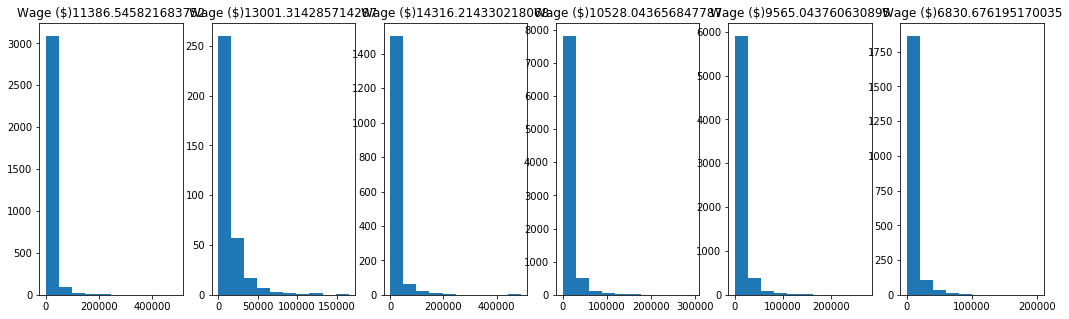

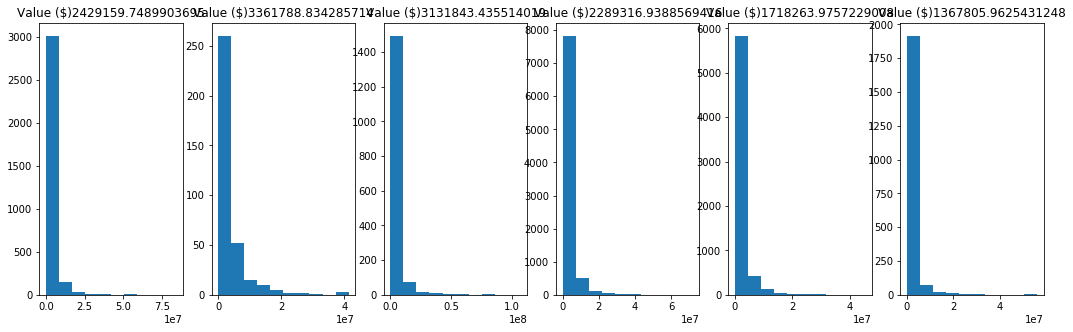

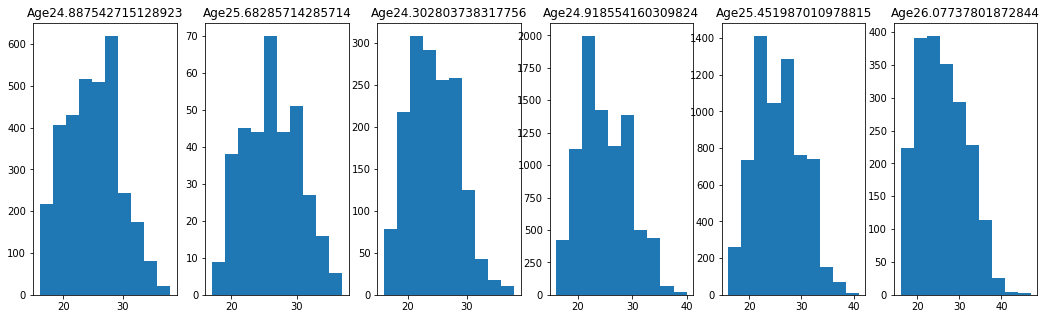

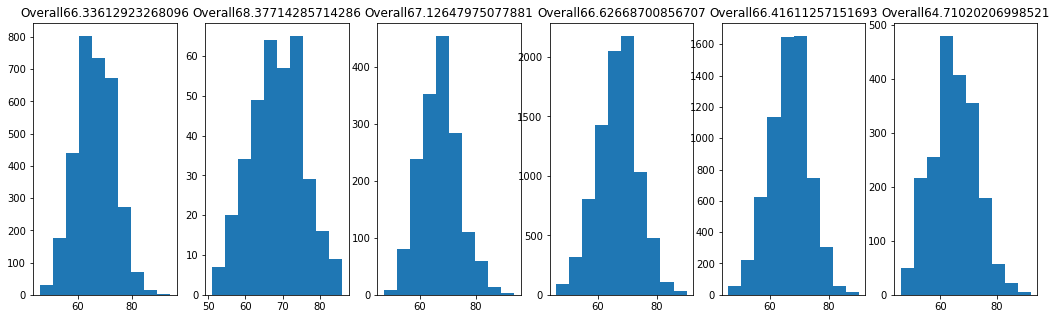

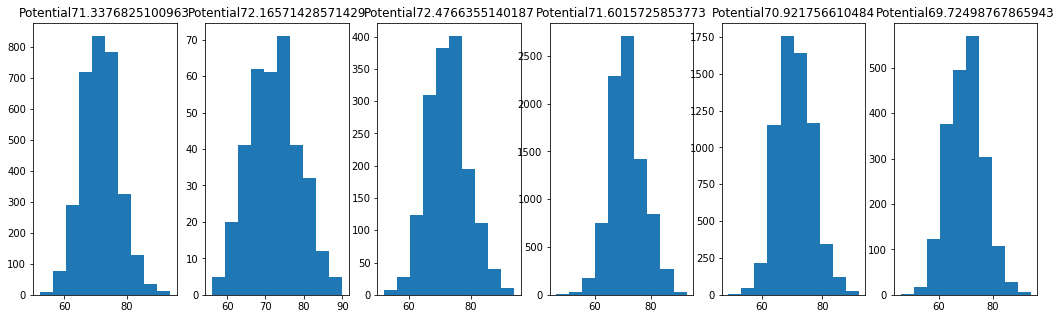

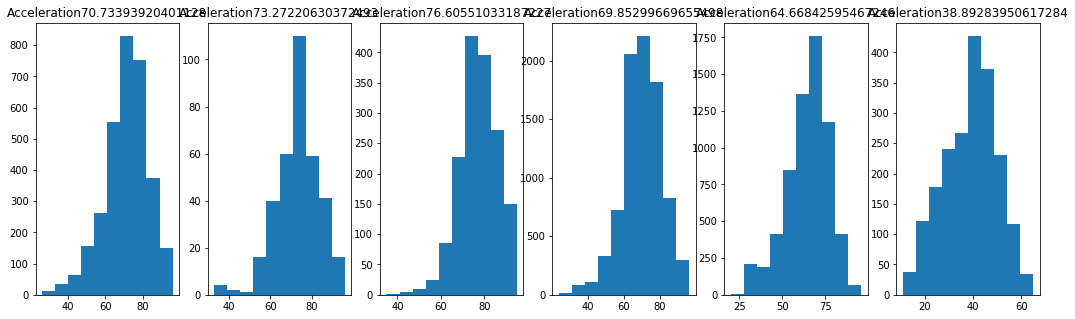

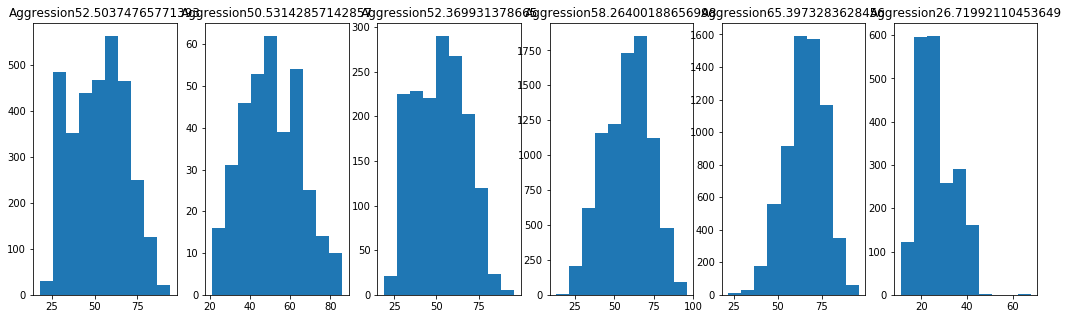

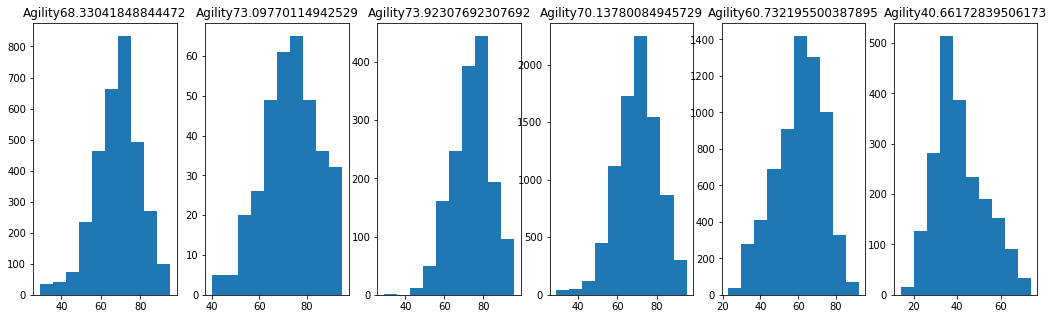

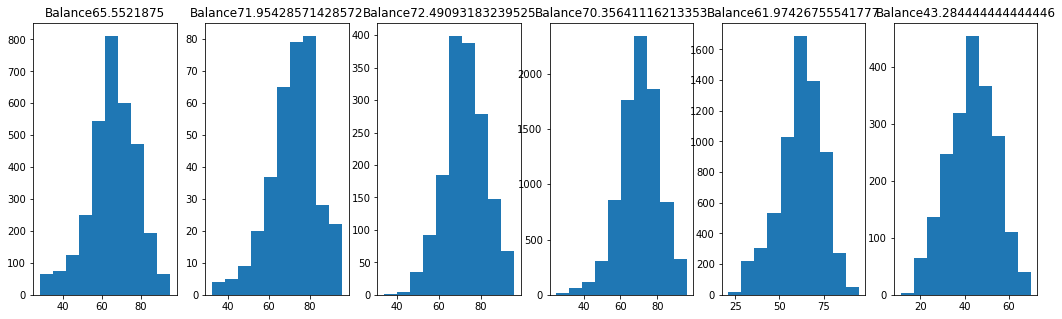

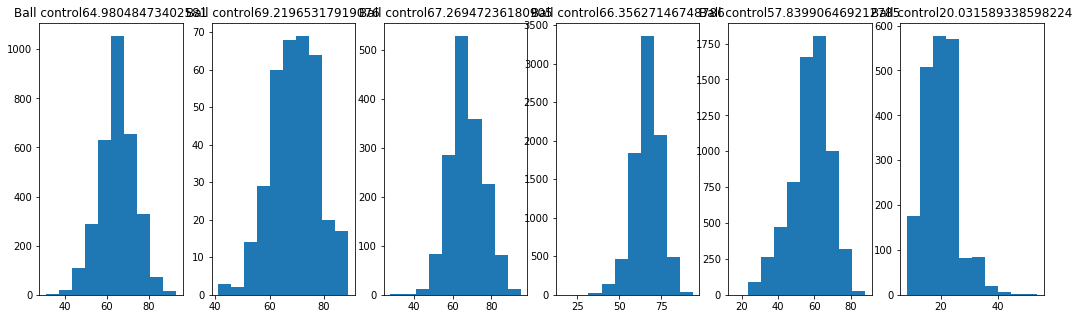

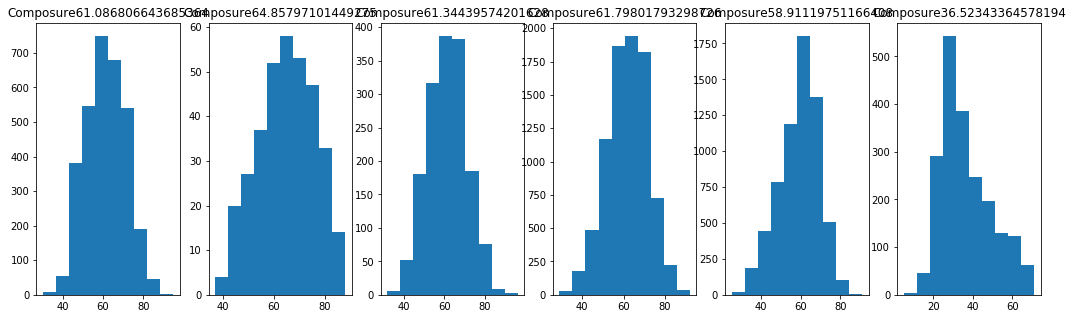

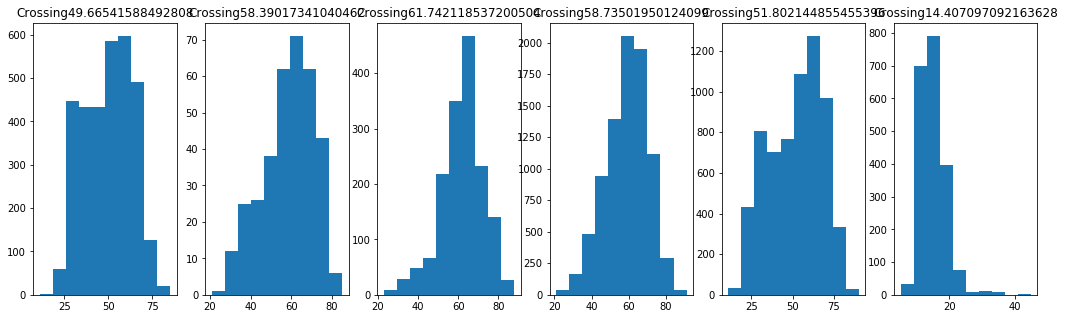

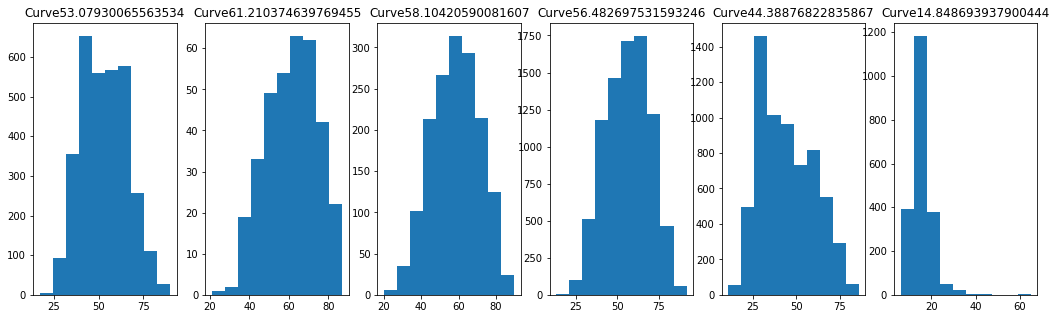

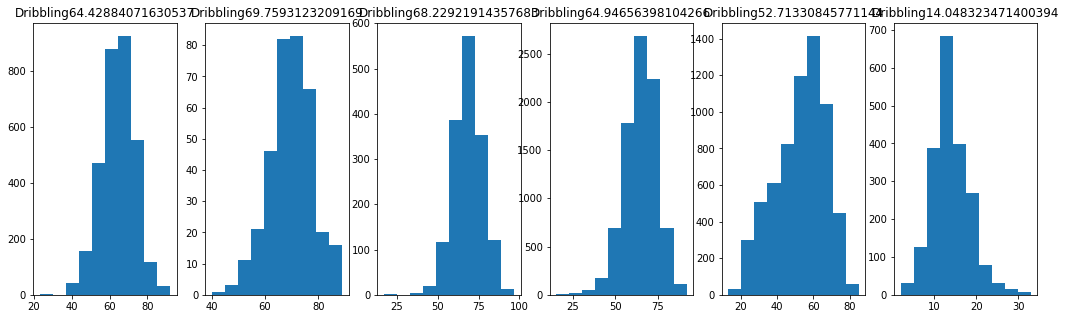

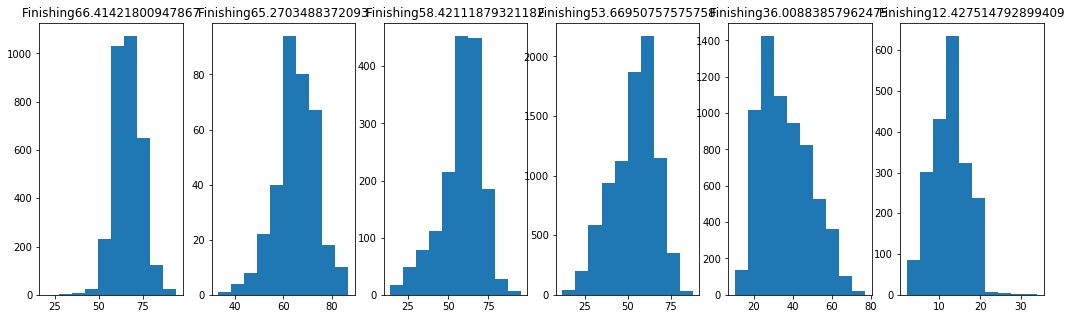

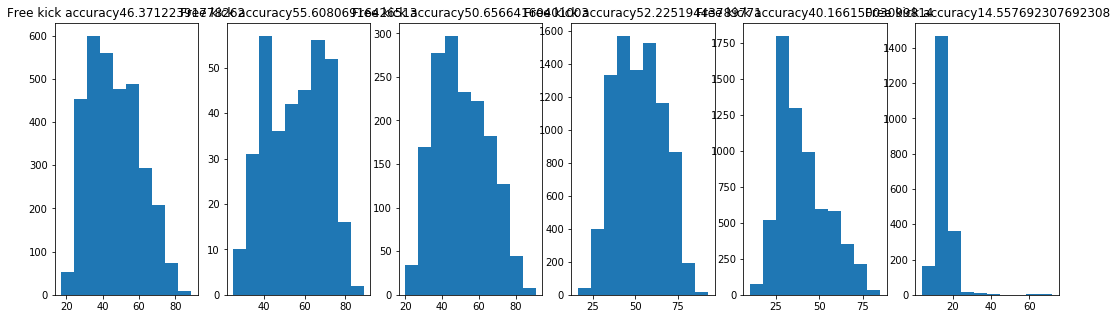

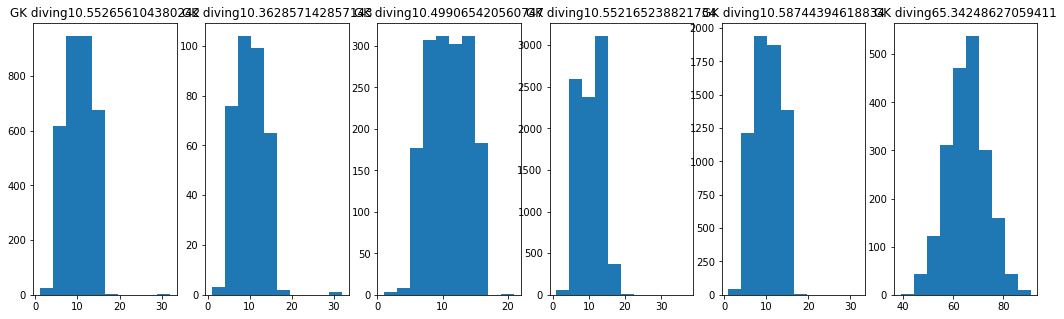

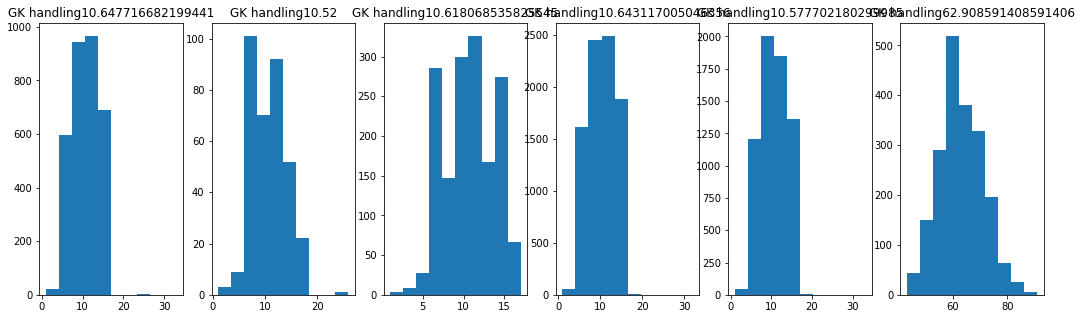

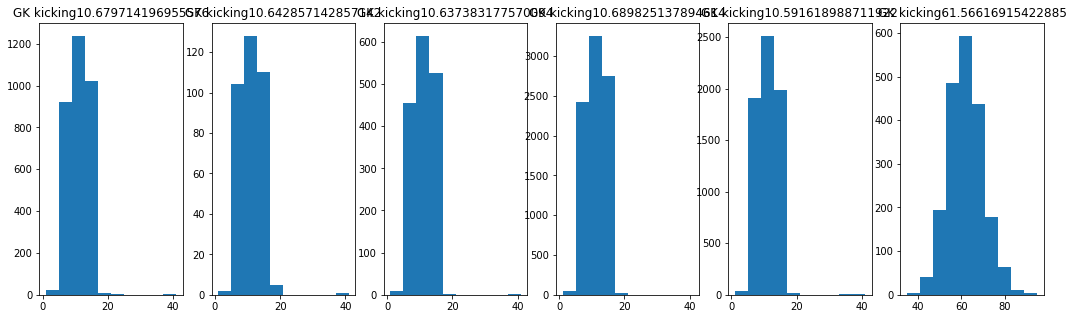

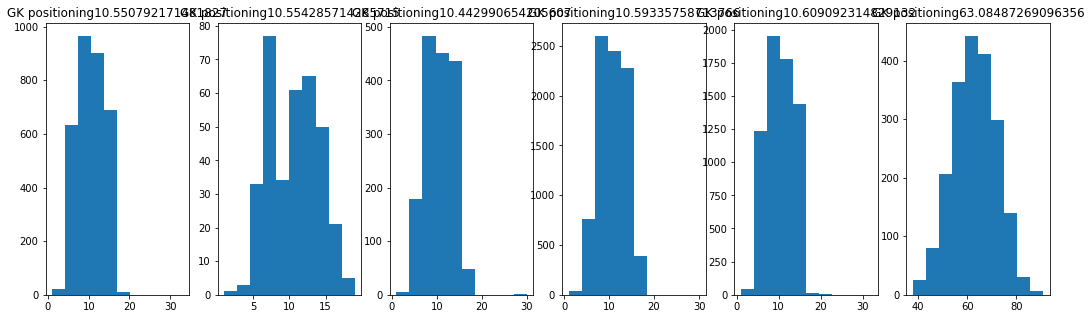

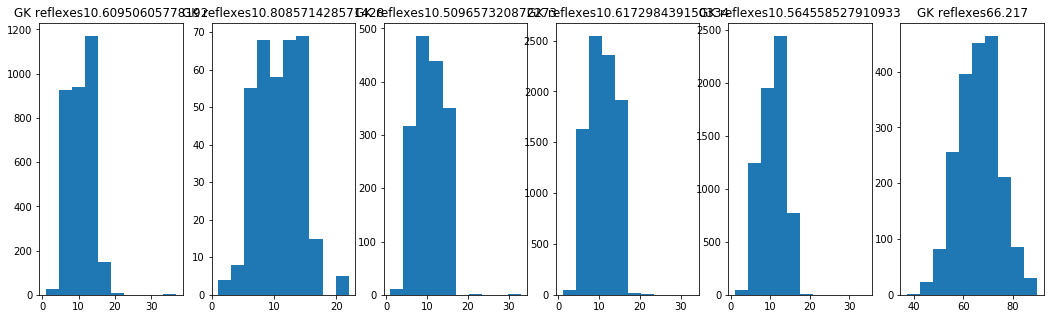

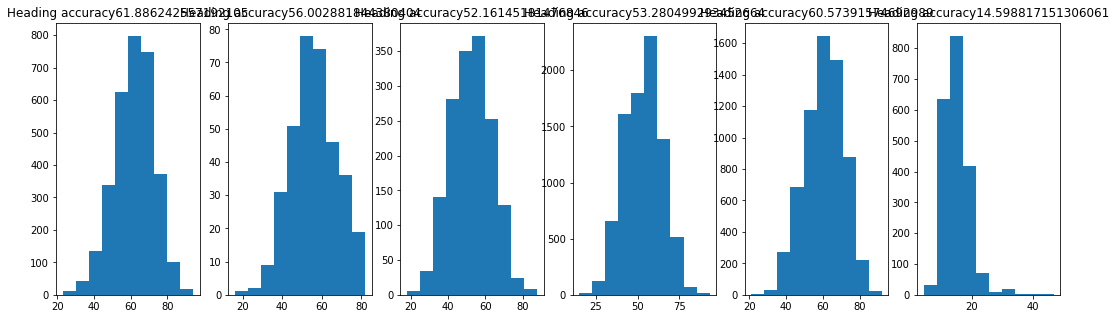

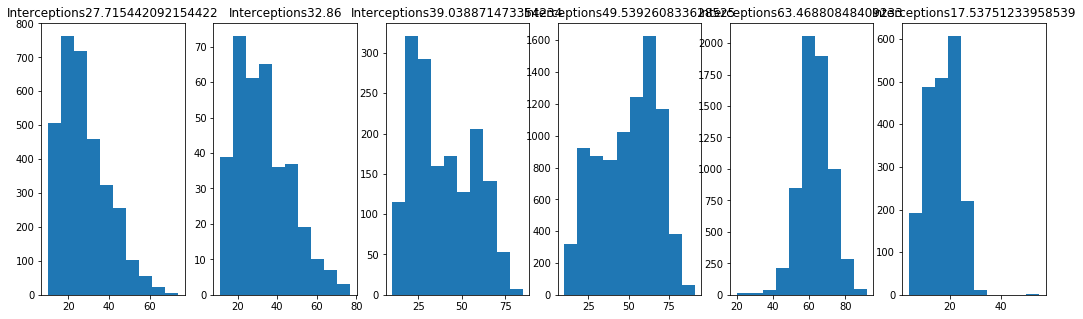

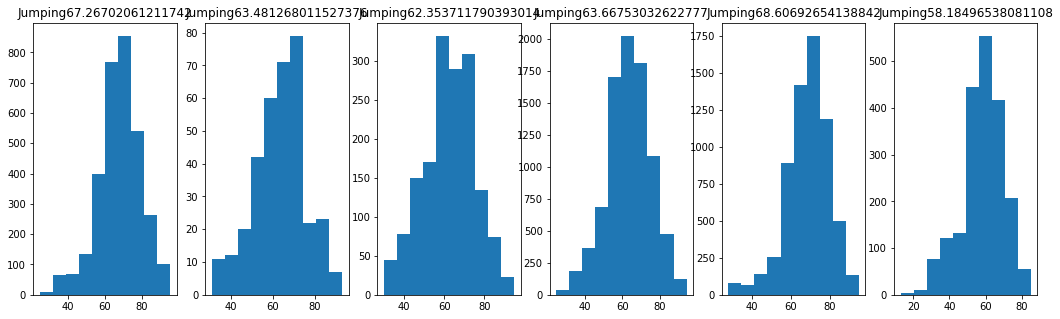

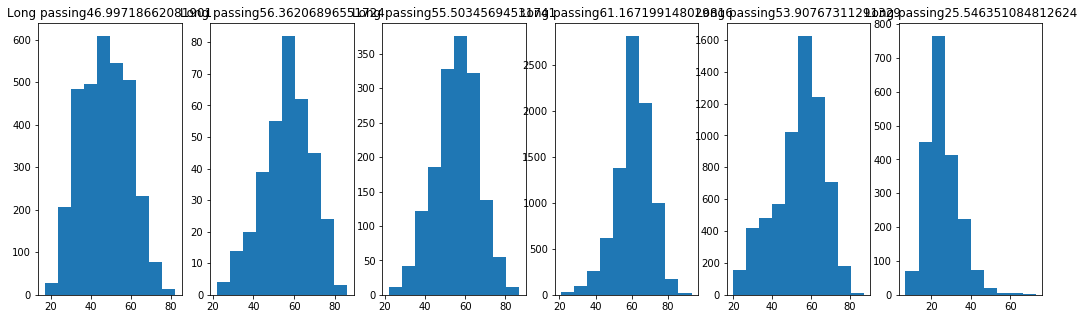

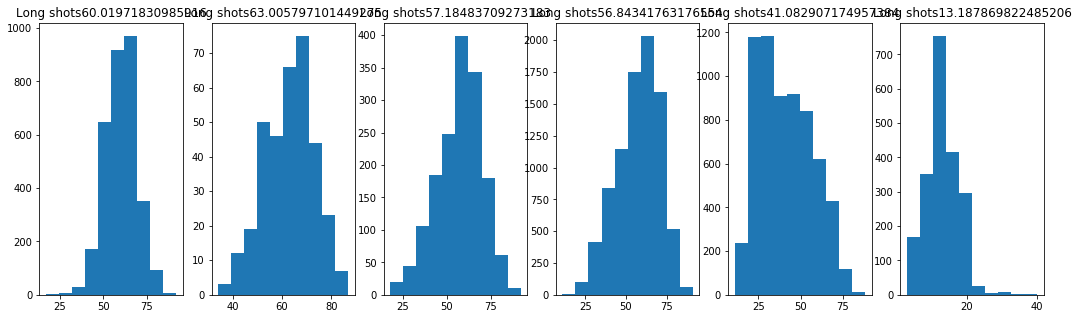

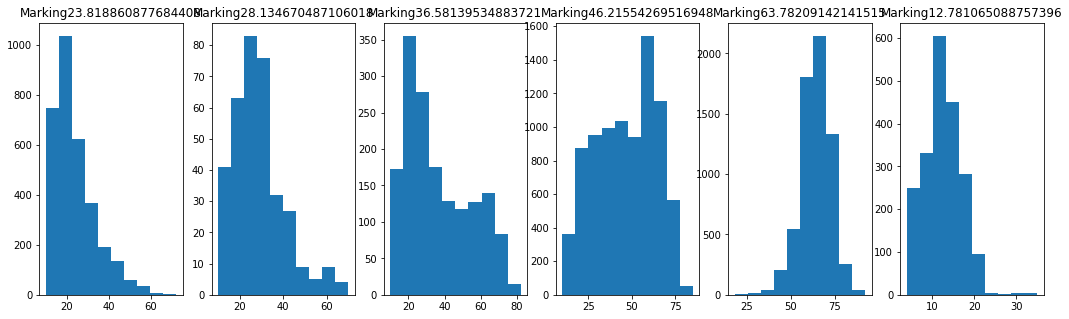

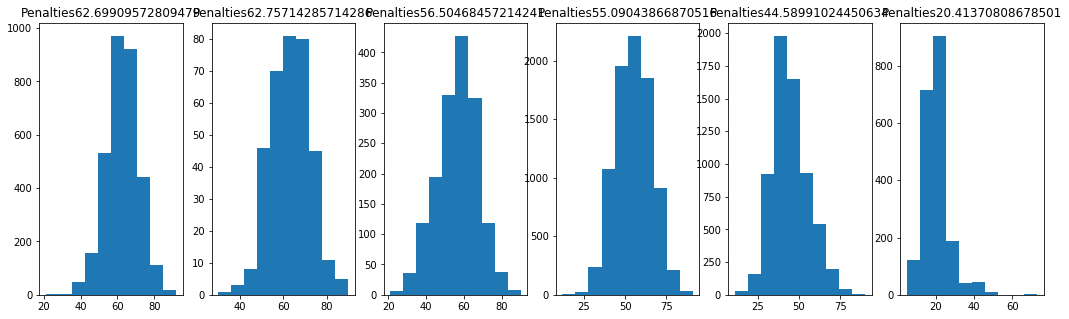

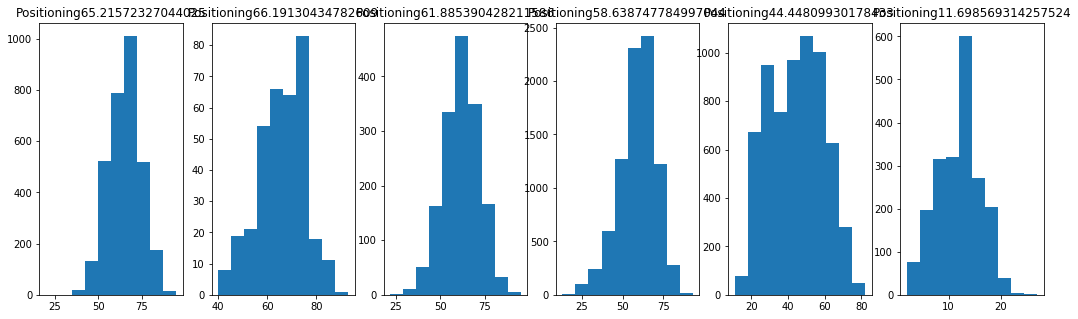

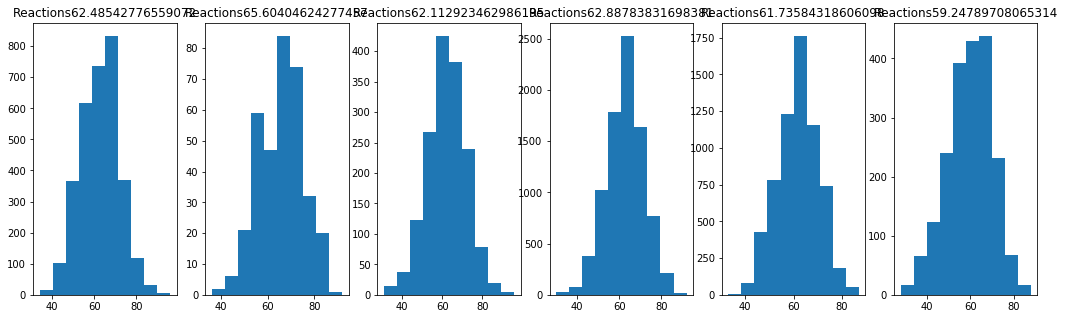

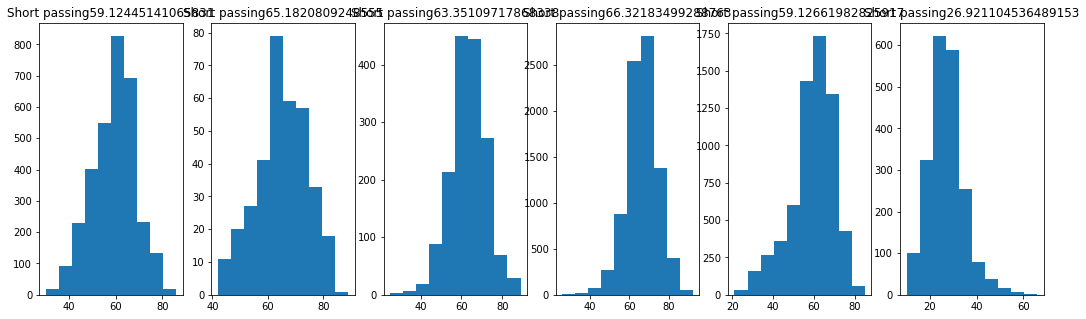

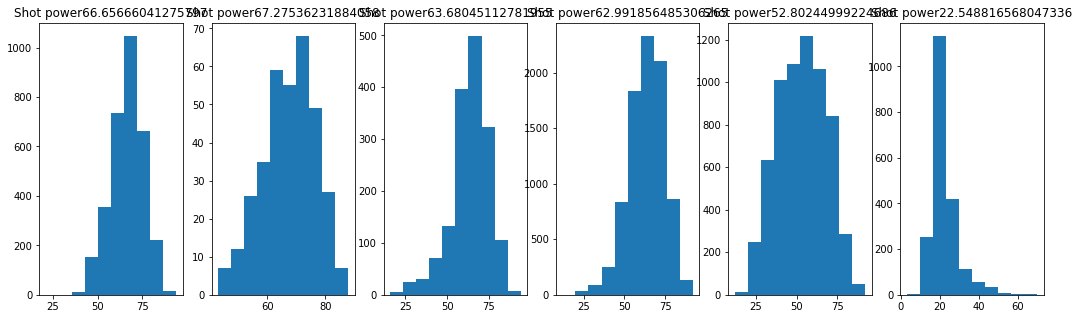

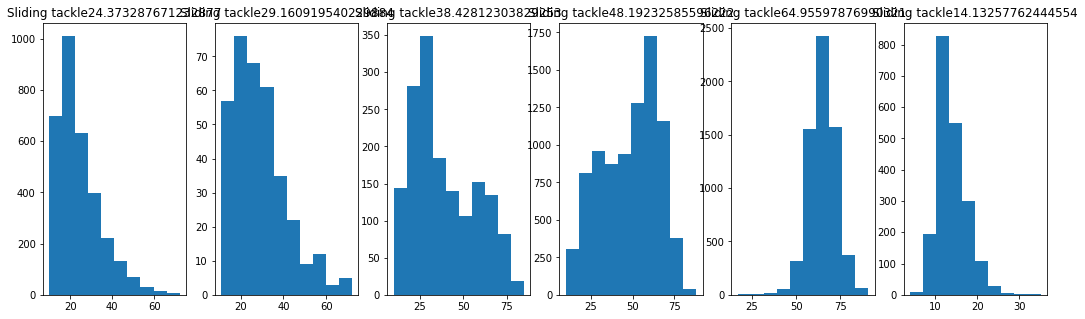

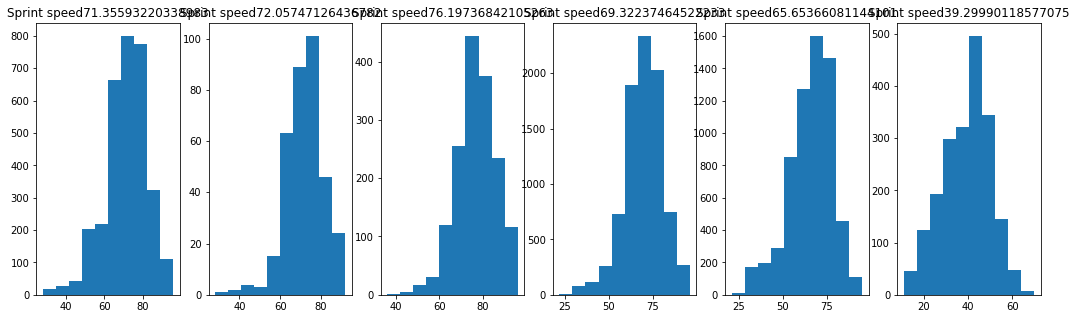

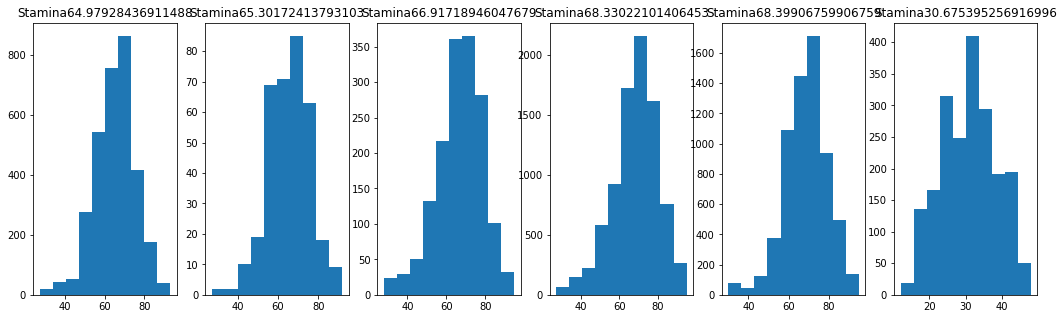

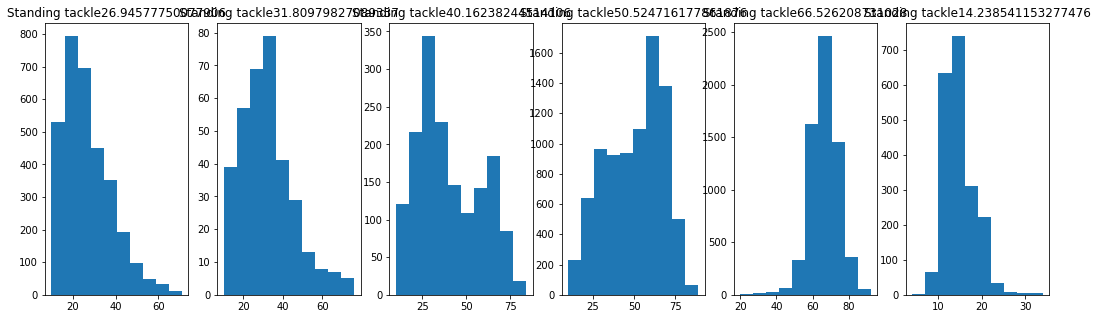

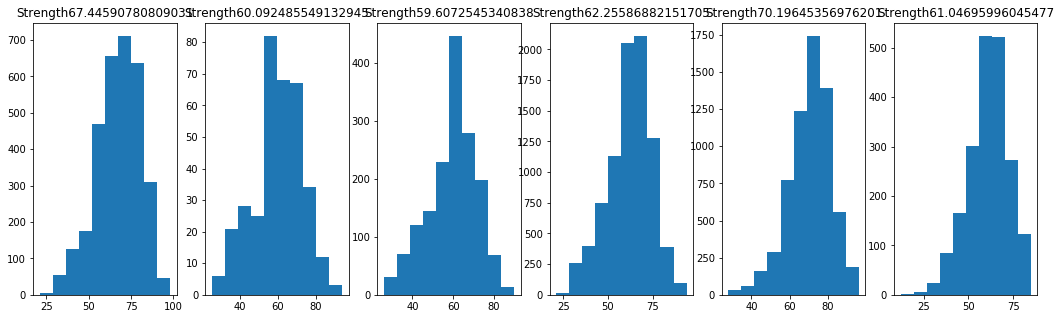

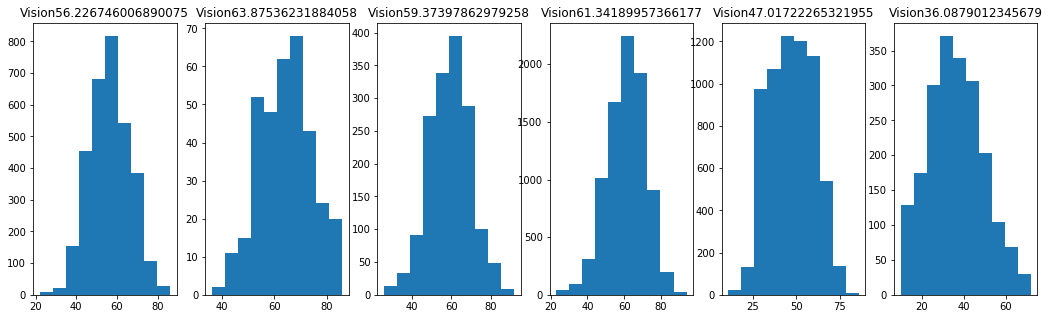

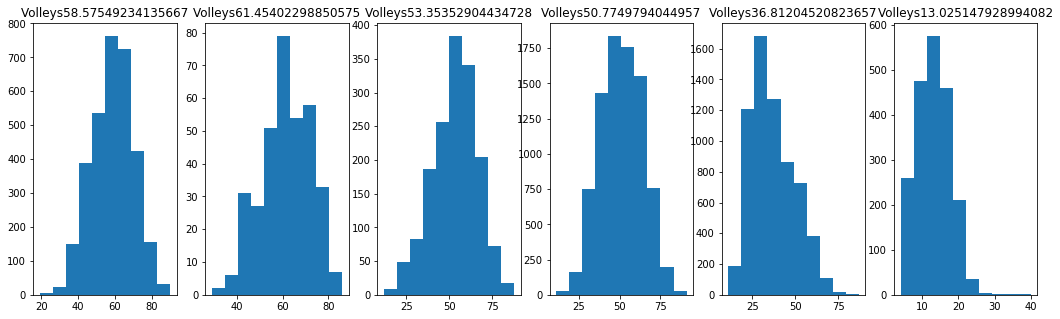

In [43]:
cols = fb.select_dtypes([np.number]).columns
pos = [st, f, w, m, b, gk]
print('Strikers:Forwards:Wingers:Midfielders:Defenders:Goalies')
for col in cols:
    plt.figure(figsize = (18, 5))

    i=1
    for p in pos:
        plt.subplot(1, 6, i)
        plt.hist(p[col])
        plt.title(col + str(p[col].mean()))
        i = i + 1
    plt.show()

#### Summary of position-wise data

Defenders and goalies are the poor chaps in football- they dont earn as much as players at other positions.

Forwards are the hot commodities since they have the highest dollar value.

Goalies are the oldies

On the overall scale, forwards are the best players and goalies are the worst.

Wingers, as expected, are the best accelerators and defenders, as expected, are the most aggressive.

Wingers, again, are the most agile. Defenders are surprisingly not agile. 

In terms of ball control too, wingers and midfielders are the best.

Poor goalies, they are much worse than others in terms of composure. 

Wingers are also the best dribblers along with forwards.

Needless to say, strikers are the best finishers.

Forwards are the free kick kings. Don't let a defender take a free kick, especially if it matters.

When it comes to headers, strikers and defenders are the best.

Midfielders are the best for long passes, but not so for long shots. You better let your forward/strikers to take a long shot.

To be at the right place at the right time, trust your strikers. Also for powerful shots.

Wingers are undoubtedly the fastest on the ground but when it comes to stamina, defenders are the better ones.

In matters of strength, defenders take it all. Wingers really need to gain some ground.

Trust your midfielders who have the best vision to find the best pass at a given point.

### Other trends?

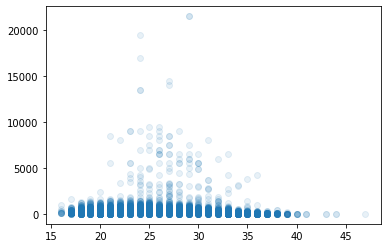

In [44]:
plt.scatter(y = fb['Value ($)']/fb['Wage ($)'], x = fb['Age'], alpha = 0.1)
plt.show()


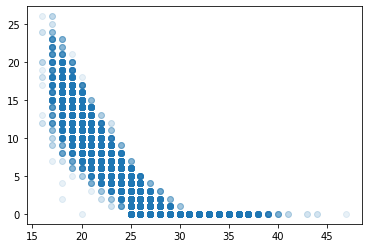

In [45]:
plt.scatter(y = (fb['Potential']-fb['Overall']), x = fb['Age'], alpha = 0.1)
plt.show()

There is quite a strong negative correlation until the age of 30 as expected. But what is surprising is that beyond the age of 30, no player has a higher potential, meaning he has already achieved his potential. But this leads us to believing that players do not peak after 30, is that true?

In [46]:
ngk.corr()

Wage ($)  Value ($)       Age   Overall  Potential  \
Wage ($)            1.000000   0.853882  0.152978  0.598139   0.520702   
Value ($)           0.853882   1.000000  0.085301  0.633918   0.591086   
Age                 0.152978   0.085301  1.000000  0.462062  -0.228583   
Overall             0.598139   0.633918  0.462062  1.000000   0.675489   
Potential           0.520702   0.591086 -0.228583  0.675489   1.000000   
Acceleration        0.133408   0.178171 -0.187847  0.171682   0.244557   
Aggression          0.218224   0.197017  0.392642  0.457879   0.180995   
Agility             0.166516   0.203745 -0.010221  0.251339   0.224965   
Balance             0.066829   0.095669 -0.080272  0.061221   0.112166   
Ball control        0.432210   0.469022  0.251328  0.704506   0.530127   
Composure           0.461627   0.486391  0.459235  0.775944   0.472185   
Crossing            0.289441   0.301384  0.273869  0.498350   0.287946   
Curve               0.308658   0.336130  0.267728  0.501637   0.314884   
Dribbling           0.331270   0.367843  0.099242  0.493546   0.415452   
Finishing           0.257493   0.291809  0.144469  0.362688   0.252617   
Free kick accuracy  0.273170   0.301810  0.318553  0.464187   0.246724   
GK diving           0.001137  -0.003752  0.052890  0.035604  -0.013058   
GK handling         0.000059  -0.000805  0.053995  0.045352  -0.007312   
GK kicking         -0.001691  -0.000824  0.062652  0.045233  -0.015721   
GK positioning     -0.009310  -0.011218  0.056246  0.031919  -0.019266   
GK reflexes        -0.006775  -0.008447  0.055018  0.033432  -0.020983   
Heading accuracy    0.264549   0.240315  0.344441  0.473817   0.237859   
Interceptions       0.156018   0.132466  0.289526  0.344003   0.150243   
Jumping             0.135067   0.120489  0.172695  0.237894   0.097562   
Long passing        0.328730   0.345728  0.316436  0.579472   0.371315   
Long shots          0.302602   0.327943  0.270073  0.496947   0.300134   
Marking             0.095537   0.058067  0.226741  0.251355   0.102535   
Penalties           0.266530   0.277783  0.248146  0.388518   0.228459   
Positioning         0.290979   0.323515  0.187493  0.431466   0.283445   
Reactions           0.507721   0.539642  0.468082  0.836831   0.509781   
Short passing       0.413682   0.444515  0.306601  0.700776   0.495961   
Shot power          0.329247   0.346046  0.297510  0.551379   0.339383   
Sliding tackle      0.103698   0.066768  0.186224  0.226118   0.109957   
Sprint speed        0.143410   0.183011 -0.172563  0.195739   0.254521   
Stamina             0.239196   0.256056  0.207532  0.455456   0.241111   
Standing tackle     0.122079   0.090913  0.215723  0.267516   0.129290   
Strength            0.158176   0.132012  0.341360  0.346057   0.089803   
Vision              0.330270   0.364843  0.247470  0.507423   0.344025   
Volleys             0.302953   0.332850  0.236426  0.441640   0.273300   

                    Acceleration  Aggression   Agility   Balance  \
Wage ($)                0.133408    0.218224  0.166516  0.066829   
Value ($)               0.178171    0.197017  0.203745  0.095669   
Age                    -0.187847    0.392642 -0.010221 -0.080272   
Overall                 0.171682    0.457879  0.251339  0.061221   
Potential               0.244557    0.180995  0.224965  0.112166   
Acceleration            1.000000   -0.207365  0.718374  0.582060   
Aggression             -0.207365    1.000000 -0.160237 -0.199127   
Agility                 0.718374   -0.160237  1.000000  0.705274   
Balance                 0.582060   -0.199127  0.705274  1.000000   
Ball control            0.380392    0.122749  0.547414  0.364343   
Composure               0.102180    0.360223  0.248695  0.100922   
Crossing                0.430927    0.105064  0.543052  0.435097   
Curve                   0.361496    0.032645  0.532906  0.396655   
Dribbling               0.554793   -0.071394  0.662223  0.497641   
Finishing               0.368910   -0.2

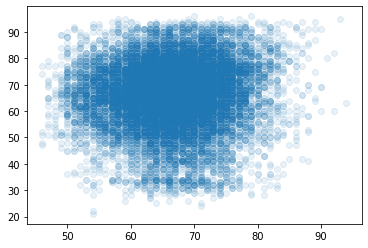

In [47]:
plt.scatter(x = ngk['Overall'], y = ngk['Balance'], alpha = 0.1)

One would expect players with high Overall rating to have high ratings in all attributes as well. In other words, onw expects the Overall rating to be fairly correlated with other attributes. Almost all attributes have a fair correlation except Balance. 

This leads us to believe that 'Balance' is the most useless attribute(?)